In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re

In [3]:
df = pd.read_csv("data/merged/houses-flats-extra-address-v1.csv")
df.head()

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,...,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India","1,40,000 per sq.yards",...,3,40.0,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.000
1,V75627519,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"Sector 11 Chandigarh, Chandigarh, India","Sector 11 Chandigarh, Chandigarh, India","2,80,000 per sq.yards",...,1,40.0,Municipal corporation,NaN,Yes,No,Check out this 3 bhk house for sale in sector ...,NaN,"['False Ceiling Lighting', 'Separate entry for...",14.000
2,P75122867,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Bajwa Sunny Urban Greens,Mohali,Mohali,"Bajwa Sunny Urban Greens, Mohali, Chandigarh, ...","Mohali, Chandigarh, India","6,944 per sq.ft.",...,0,NaN,NaN,NaN,No,No,We have a house/villa available for sale in mo...,[],NaN,2.500
3,W75661879,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Altura Apartments,Zirakpur,Mohali,"Altura Apartments, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",813 per sq.ft.,...,1,NaN,24*7 Water,Full,Yes,Yes,Penthouse with open bath tub very big terrace ...,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dini...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1.650
4,P75385469,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","Dera Bassi, Chandigarh, India","52,589 per sq.yards",...,1,30.0,Borewell/Tank,NaN,No,No,Welcome to the epitome of comfortable living i...,"['16 Light', '1 Modular Kitchen', '1 Chimney',...","['Maintenance Staff', 'Water Storage', 'Park',...",0.589


In [4]:
len(df)

8494

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
pd.options.display.float_format = '{:.2f}'.format

In [7]:
df.head(1)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India","1,40,000 per sq.yards",Plot area 2000(1672.25 sq.m.) sq.yards,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.00,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.00


In [8]:
df[['property_type','area','area_unit']].sample(5)

,property_type,area,area_unit
4939,Flat/Apartment,Super Built up area 1885(175.12 sq.m.)Carpet a...,sq.ft.
7103,Flat/Apartment,Super Built up area 3100(288 sq.m.) sq.ft.,sq.ft.
1534,House/Villa,Plot area 14(354.1 sq.m.) marla,marla
5116,Flat/Apartment,Super Built up area 2100(195.1 sq.m.)Built Up ...,sq.ft.
4453,Flat/Apartment,Super Built up area 1305(121.24 sq.m.) sq.ft.,sq.ft.


In [9]:
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
def get_plot_area(text):
    match = re.search(r'Plot area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [11]:
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [12]:
super_built_up = df['area'].apply(get_super_built_up_area).rename('SuperBuiltUp')

In [13]:
plot_area = df['area'].apply(get_plot_area).rename('PlotArea')

In [14]:
built_up_area = df['area'].apply(lambda x: get_area(x, 'Built Up area')).rename('BuiltUp')

In [15]:
carpet_area = df['area'].apply(lambda x: get_area(x, 'Carpet area')).rename('CarpetArea')

In [16]:
df.insert(11,'Plot Area',value = plot_area)
df.insert(11,'Carpet area',value = carpet_area)
df.insert(11,'Built Up area',value = built_up_area)
df.insert(11,'Super Built Up',value = super_built_up)

In [17]:
df.head()

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India","1,40,000 per sq.yards",Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,2000.00,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.00,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.00
1,V75627519,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"Sector 11 Chandigarh, Chandigarh, India","Sector 11 Chandigarh, Chandigarh, India","2,80,000 per sq.yards",Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,500.00,sq.yards,3,3,2,Servant Room,South,0,1,Main Road,Old,Others,No,Unfurnished,1,1,40.00,Municipal corporation,NaN,Yes,No,Check out this 3 bhk house for sale in sector ...,NaN,"['False Ceiling Lighting', 'Separate entry for...",14.00
2,P75122867,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Bajwa Sunny Urban Greens,Mohali,Mohali,"Bajwa Sunny Urban Greens, Mohali, Chandigarh, ...","Mohali, Chandigarh, India","6,944 per sq.ft.",Plot area 3600(334.45 sq.m.) sq.ft.,NaN,NaN,NaN,3600.00,sq.ft.,6,6,2,NaN,South,0,2,NaN,RelNew,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,We have a house/villa available for sale in mo...,[],NaN,2.50
3,W75661879,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Altura Apartments,Zirakpur,Mohali,"Altura Apartments, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",813 per sq.ft.,Plot area 22000(2043.87 sq.m.) sq.ft.,NaN,NaN,NaN,22000.00,sq.ft.,4,4,4,"Pooja Room,Study Room,Servant Room,Others",NaN,0,2,"Club,Main Road,Others,Park/Garden,Pool,Sea facing",New,Others,Yes,Furnished,1,1,NaN,24*7 Water,Full,Yes,Yes,Penthouse with open bath tub very big terrace ...,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dini...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1.65
4,P75385469,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","Dera Bassi, Chandigarh, India","52,589 per sq.yards",Plot area 112(93.65 sq.m.) sq.yards,NaN,NaN,NaN,112.00,sq.yards,3,3,1,NaN,North-West,0,2,Park/Garden,UndConst,Ceramic,Yes,Semifurnished,1,1,30.00,Borewell/Tank,NaN,No,No,Welcome to the epitome of comfortable living i...,"['16 Light', '1 Modular Kitchen', '1 Chimney',...","['Maintenance Staff', 'Water Storage', 'Park',...",0.59


In [18]:
df['link'].loc[19]

'https://www.99acres.com/6-bhk-bedroom-independent-house-villa-for-sale-in-omaxe-new-chandigarh-mullanpur-chandigarh-45000-sq-ft-r2-spid-Z72029958'

In [19]:
df['area_unit'].value_counts()

area_unit
sq.ft.      5634
sq.yards    1980
marla        611
kanal        234
sq.m.         24
biswa          2
Name: count, dtype: int64

In [20]:
def priceprsqft(text):
    # Use regex to find all numbers in the string
    numbers = re.findall(r'\d+', text)
    # Join all found numbers into a single string
    return ''.join(numbers)

In [21]:
df['PricePerUnit'] = df['PricePerUnit'].apply(priceprsqft).astype(float)

In [22]:
df['area_unit'].fillna('sq.ft.',inplace = True)

In [23]:
def arunit(x):
    return x.strip().lower()

In [24]:
df['area_unit'] = df['area_unit'].apply(arunit)

In [25]:
def price_per_unit(row):
    if row['area_unit'] == 'sq.yards':
        return row['PricePerUnit'] / 9.0  
    elif row['area_unit'] == 'marla':
        return row['PricePerUnit'] / 272.25
    elif row['area_unit'] == 'kanal':
        return row['PricePerUnit'] / 5445
    elif row['area_unit'] == 'sq.m.':
        return row['PricePerUnit'] / 10.764
    elif row['area_unit'] == 'biswa':
        return row['PricePerUnit'] / 272.25
    else:
        return row['PricePerUnit']

In [26]:
df['PricePerUnit']

0         140000.00
1         280000.00
2           6944.00
3            813.00
4          52589.00
5         150000.00
6         500000.00
7         114285.00
8        2666666.00
9           7750.00
10          5909.00
11          9496.00
12       8000000.00
13       8125000.00
14        280000.00
15         22222.00
16       2500000.00
17          7936.00
18        133550.00
19        133550.00
20         75000.00
21         18333.00
22         12000.00
23         34000.00
24         84375.00
25          8444.00
26        152500.00
27         11250.00
28         23703.00
29          9090.00
30         57251.00
31       8000000.00
32          5000.00
33          6292.00
34         13333.00
35         84000.00
36          7500.00
37          7000.00
38          8539.00
39         75107.00
40         12544.00
41          1960.00
42     130000000.00
43         26666.00
44        139000.00
45     135000000.00
46        397727.00
47        250000.00
48        120000.00
49        240000.00


In [27]:
df['PricePerUnit'] = df.apply(price_per_unit,axis = 1)

In [28]:
df.loc[42]

property_id                                                   X75631591
property_name                                          4Bedrooms 3Baths
property_type                                               House/Villa
link                  https://www.99acres.com/4-bhk-bedroom-independ...
Society                                                             NaN
Sector                                             Sector 35 Chandigarh
City                                                         Chandigarh
address1              INDEPENDENT HOUSE, Sector 35A Chandigarh, Chan...
address2              Sector-35-A, Sector 35A Chandigarh, Chandigarh...
PricePerUnit                                                   23875.11
area                                   Plot area 1(505.86 sq.m.)  kanal
Super Built Up                                                      NaN
Built Up area                                                       NaN
Carpet area                                                     

In [29]:
df.head()

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.56,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,2000.00,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.00,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.00
1,V75627519,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"Sector 11 Chandigarh, Chandigarh, India","Sector 11 Chandigarh, Chandigarh, India",31111.11,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,500.00,sq.yards,3,3,2,Servant Room,South,0,1,Main Road,Old,Others,No,Unfurnished,1,1,40.00,Municipal corporation,NaN,Yes,No,Check out this 3 bhk house for sale in sector ...,NaN,"['False Ceiling Lighting', 'Separate entry for...",14.00
2,P75122867,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Bajwa Sunny Urban Greens,Mohali,Mohali,"Bajwa Sunny Urban Greens, Mohali, Chandigarh, ...","Mohali, Chandigarh, India",6944.00,Plot area 3600(334.45 sq.m.) sq.ft.,NaN,NaN,NaN,3600.00,sq.ft.,6,6,2,NaN,South,0,2,NaN,RelNew,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,We have a house/villa available for sale in mo...,[],NaN,2.50
3,W75661879,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Altura Apartments,Zirakpur,Mohali,"Altura Apartments, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",813.00,Plot area 22000(2043.87 sq.m.) sq.ft.,NaN,NaN,NaN,22000.00,sq.ft.,4,4,4,"Pooja Room,Study Room,Servant Room,Others",NaN,0,2,"Club,Main Road,Others,Park/Garden,Pool,Sea facing",New,Others,Yes,Furnished,1,1,NaN,24*7 Water,Full,Yes,Yes,Penthouse with open bath tub very big terrace ...,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dini...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1.65
4,P75385469,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","Dera Bassi, Chandigarh, India",5843.22,Plot area 112(93.65 sq.m.) sq.yards,NaN,NaN,NaN,112.00,sq.yards,3,3,1,NaN,North-West,0,2,Park/Garden,UndConst,Ceramic,Yes,Semifurnished,1,1,30.00,Borewell/Tank,NaN,No,No,Welcome to the epitome of comfortable living i...,"['16 Light', '1 Modular Kitchen', '1 Chimney',...","['Maintenance Staff', 'Water Storage', 'Park',...",0.59


In [30]:
df['PricePerUnit'].describe()

count        8494.00
mean        31365.82
std       1419155.39
min             2.00
25%          5666.00
50%          8402.00
75%         15603.75
max     129500000.00
Name: PricePerUnit, dtype: float64

In [31]:
def area_convert(row,area_type):
    if row['area_unit'] == 'sq.yards':
        return row[area_type] * 9.0  
    elif row['area_unit'] == 'marla':
        return row[area_type] * 272.25
    elif row['area_unit'] == 'kanal':
        return row[area_type] * 5445
    elif row['area_unit'] == 'sq.m.':
        return row[area_type] * 10.764
    elif row['area_unit'] == 'biswa':
        return row[area_type] * 272.25
    else:
        return row[area_type]

In [32]:
df['Super Built Up'] = df.apply(lambda x : area_convert(x,'Super Built Up'),axis =1)
df['Built Up area'] = df.apply(lambda x : area_convert(x,'Built Up area'),axis =1)
df['Carpet area'] = df.apply(lambda x : area_convert(x,'Carpet area'),axis =1)
df['Plot Area'] = df.apply(lambda x : area_convert(x,'Plot Area'),axis =1)

In [33]:
df['Plot Area']

0      18000.00
1       4500.00
2       3600.00
3      22000.00
4       1008.00
5        300.00
6       4500.00
7       3150.00
8        816.75
9        800.00
10       125.00
11      1053.00
12      2722.50
13      2178.00
14      2250.00
15      1800.00
16       871.20
17       882.00
18       307.00
19      2763.00
20      1800.00
21       900.00
22      1250.00
23      1125.00
24      1440.00
25       900.00
26      3600.00
27      4000.00
28      1350.00
29      1485.00
30      2358.00
31      3267.00
32       900.00
33       890.00
34      2250.00
35       900.00
36      1000.00
37      1400.00
38       445.00
39          NaN
40      2790.00
41          NaN
42      5445.00
43      4500.00
44       900.00
45     10890.00
46      4752.00
47      1800.00
48       150.00
49      9000.00
50      1530.00
51      1530.00
52      2250.00
53      4500.00
54      1800.00
55       750.00
56      1530.00
57      1683.00
58      1521.00
59      3995.00
60      1530.00
61     11430.00
62      

In [34]:
df.head()

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.56,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.00,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.00,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.00
1,V75627519,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"Sector 11 Chandigarh, Chandigarh, India","Sector 11 Chandigarh, Chandigarh, India",31111.11,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,3,3,2,Servant Room,South,0,1,Main Road,Old,Others,No,Unfurnished,1,1,40.00,Municipal corporation,NaN,Yes,No,Check out this 3 bhk house for sale in sector ...,NaN,"['False Ceiling Lighting', 'Separate entry for...",14.00
2,P75122867,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Bajwa Sunny Urban Greens,Mohali,Mohali,"Bajwa Sunny Urban Greens, Mohali, Chandigarh, ...","Mohali, Chandigarh, India",6944.00,Plot area 3600(334.45 sq.m.) sq.ft.,NaN,NaN,NaN,3600.00,sq.ft.,6,6,2,NaN,South,0,2,NaN,RelNew,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,We have a house/villa available for sale in mo...,[],NaN,2.50
3,W75661879,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Altura Apartments,Zirakpur,Mohali,"Altura Apartments, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",813.00,Plot area 22000(2043.87 sq.m.) sq.ft.,NaN,NaN,NaN,22000.00,sq.ft.,4,4,4,"Pooja Room,Study Room,Servant Room,Others",NaN,0,2,"Club,Main Road,Others,Park/Garden,Pool,Sea facing",New,Others,Yes,Furnished,1,1,NaN,24*7 Water,Full,Yes,Yes,Penthouse with open bath tub very big terrace ...,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dini...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1.65
4,P75385469,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","Dera Bassi, Chandigarh, India",5843.22,Plot area 112(93.65 sq.m.) sq.yards,NaN,NaN,NaN,1008.00,sq.yards,3,3,1,NaN,North-West,0,2,Park/Garden,UndConst,Ceramic,Yes,Semifurnished,1,1,30.00,Borewell/Tank,NaN,No,No,Welcome to the epitome of comfortable living i...,"['16 Light', '1 Modular Kitchen', '1 Chimney',...","['Maintenance Staff', 'Water Storage', 'Park',...",0.59


In [35]:
df.sample(5)

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
5502,N75949497,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,NaN,Peer Muchalla,Panchkula,"Victoria Heights, Peer Muchalla, Panchkula, Ha...","Peer Muchalla, Panchkula, Haryana",4285.00,Carpet area: 1750 (162.58 sq.m.) sq.ft.,NaN,NaN,1750.00,NaN,sq.ft.,3,3,2,Pooja Room,East,7,10,"Club,Main Road,Others,Park/Garden,Pool",RelNew,Vitrified,Yes,Semifurnished,1,1,65.00,"24*7 Water,Municipal corporation",Partial,Yes,Yes,Victoria heights is one of the most popular de...,"['3 Wardrobe', '1 Exhaust Fan', '6 Light', '1 ...","['Feng Shui / Vaastu Compliant', 'Security / F...",0.75
5017,U58890610,3BHK 3Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Chandigarh Housing Board Flats Mohali,Phase 9 Mohali,Mohali,"Chandigarh Housing Board, Sector 63 Chandigarh...","Sector 63 Chandigarh, Chandigarh, India",13724.00,Carpet area: 1450 (134.71 sq.m.) sq.ft.,NaN,NaN,1450.00,NaN,sq.ft.,3,3,3,NaN,West,2,6,NaN,RelNew,NaN,No,Semifurnished,0,1,NaN,Municipal corporation,Partial,Yes,Yes,3 bhk flat available for sale in sector 63 hig...,"['1 Fan', '1 Geyser', '1 Light', '1 Chimney', ...","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'M...",1.99
3284,D59732024,3BHK 4Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Sushma Chandigarh Grande,Zirakpur,Mohali,"Sushma Chandigarh Grande, Zirakpur, Chandigarh...","Zirakpur, Chandigarh, India",4988.00,Super Built up area 2085(193.7 sq.m.) sq.ft.,2085.00,NaN,NaN,NaN,sq.ft.,3,4,4,"Servant Room,Pooja Room",South-East,2,16,NaN,New,NaN,No,Unfurnished,0,1,NaN,NaN,NaN,No,No,Newly built 3 1 bedroom flat available for sal...,NaN,"['Security / Fire Alarm', 'Intercom Facility',...",1.04
6273,Z59102478,3BHK 2Baths,Flat/Apartment,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ambika La Parisian,Sector 66 Mohali,Mohali,"Ambika La Parisian, Sector 66b Mohali, Mohali,...","Sector 66b Mohali, Mohali, Punjab",13888.00,Super Built up area 1400(130.06 sq.m.)Built Up...,1400.00,965.00,864.00,NaN,sq.ft.,3,2,3,NaN,North-East,12,15,Main Road,New,Vitrified,Yes,Furnished,1,0,40.00,"Borewell/Tank,Municipal corporation",Full,Yes,Yes,Ambika la parisian is one of the most popular ...,"['2 Light', '1 Modular Kitchen', '2 Wardrobe',...","['Feng Shui / Vaastu Compliant', 'Security / F...",1.20
387,H74809175,6Bedrooms 4Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 19 Chandigarh,Chandigarh,"Sector 19 Chandigarh, Chandigarh, India","Sector 19 Chandigarh, Chandigarh, India",28888.89,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,6,4,4,NaN,NaN,0,2,NaN,Old,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,One kanal house park facing old construction,[],NaN,13.50


In [36]:
df[df['PricePerUnit'] > 100000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
5,K74830117,9Bedrooms 9Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",150000.00,Plot area 300(27.87 sq.m.) sq.ft.,NaN,NaN,NaN,300.00,sq.ft.,9,9,4,Pooja Room,North,0,3,"Main Road,Park/Garden",New,Marble,Yes,Furnished,2,1,40.00,"24*7 Water,Borewell/Tank",Partial,Yes,Yes,"Eco-City 1 north-Facing, single line, fully fu...","['9 Wardrobe', '12 Fan', '16 Light', '1 Modula...","['Feng Shui / Vaastu Compliant', 'Water purifi...",4.50
18,D72030062,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",133550.00,Plot area 307(28.52 sq.m.)Built Up area: 5000 ...,NaN,5000.00,NaN,307.00,sq.ft.,6,7,4,Servant Room,West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,2,NaN,24*7 Water,Full,Yes,Yes,A designer house with lots of greenery very sp...,"['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Private Garden / Terrace', 'Maintenance Staf...",4.10
48,L76155235,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,Highland Park,Zirakpur,Mohali,"Highland Park, Zirakpur, Chandigarh, India","Near To Airport Road, Zirakpur, Chandigarh, India",120000.00,Plot area 150(13.94 sq.m.) sq.ft.,NaN,NaN,NaN,150.00,sq.ft.,5,4,3,"Pooja Room,Study Room,Servant Room",East,0,2,"Main Road,Park/Garden",UndConst,Vitrified,Yes,Semifurnished,2,1,40.00,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,On the lookout for a spacious house in chandig...,"['5 Wardrobe', '1 Water Purifier', '10 Light',...","['Private Garden / Terrace', 'High Ceiling Hei...",1.85
181,L71617202,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"Sector 8B Chandigarh, Chandigarh, India","Hon 90, Sector 8B Chandigarh, Chandigarh, India",260000.00,Plot area 2000(185.81 sq.m.) sq.ft.,NaN,NaN,NaN,2000.00,sq.ft.,4,4,4,"Pooja Room,Study Room,Servant Room",North,0,2,Others,Old,Marble,No,Unfurnished,3,0,60.00,Municipal corporation,Full,No,Yes,Good plot near park near golf club chandigarh,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",52.00
233,A76003603,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",260000.00,Plot area 500(46.45 sq.m.) sq.ft.,NaN,NaN,NaN,500.00,sq.ft.,4,3,3,NaN,NaN,0,2,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,B road 1 kanal house\nNear to market \nBest lo...,NaN,NaN,13.00
246,E76094623,9Bedrooms 4Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,NaN,Sector 21 Chandigarh,Chandigarh,"Sector 21 Chandigarh, Chandigarh, India","Sector 21 Chandigarh, Chandigarh, India",290000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,9,4,0,NaN,North-East,0,3,NaN,Old,NaN,No,Unfurnished,0,0,NaN,Municipal corporation,NaN,No,No,"Triple storey, north east facing, huge berm ah...",NaN,['Water Storage'],7.25
331,K75850763,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 42 Chandigarh,Chandigarh,"Sector 42 Chandigarh, Chandigarh, India","Sector 42 Chandigarh, Sector 42 Chandigarh, Ch...",180000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,3,2,2,Pooja Room,NaN,0,1,NaN,Old,NaN,No,Unfurnished,2,1,NaN,NaN,NaN,No,No,10 marla single storey kothi sector 42 chandig...,NaN,Na

In [37]:
df['link'].loc[402]

'https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-sector-33-chandigarh-2250-sq-ft-spid-W76472677'

In [38]:
df[df['Sector'] == 'New Chandigarh']

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
5,K74830117,9Bedrooms 9Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",150000.00,Plot area 300(27.87 sq.m.) sq.ft.,NaN,NaN,NaN,300.00,sq.ft.,9,9,4,Pooja Room,North,0,3,"Main Road,Park/Garden",New,Marble,Yes,Furnished,2,1,40.00,"24*7 Water,Borewell/Tank",Partial,Yes,Yes,"Eco-City 1 north-Facing, single line, fully fu...","['9 Wardrobe', '12 Fan', '16 Light', '1 Modula...","['Feng Shui / Vaastu Compliant', 'Water purifi...",4.50
21,K76188779,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",18333.00,Plot area 900(83.61 sq.m.) sq.ft.,NaN,NaN,NaN,900.00,sq.ft.,4,3,2,NaN,South-East,0,2,Park/Garden,UndConst,Vitrified,Yes,NaN,0,1,40.00,NaN,NaN,No,No,On the lookout for a spacious house in new cha...,[],"['Private Garden / Terrace', 'Park']",1.65
44,S76171187,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",15444.44,Plot area 100(83.61 sq.m.) sq.yards,NaN,NaN,NaN,900.00,sq.yards,4,3,4,NaN,North,0,3,NaN,New,Vitrified,No,NaN,0,3,40.00,Municipal corporation,NaN,No,No,"Good location property in new chandigarh,\nNew...",[],['No open drainage around'],1.39
54,N76126963,6Bedrooms 9Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",18611.11,Plot area 200(167.23 sq.m.) sq.yards,NaN,NaN,NaN,1800.00,sq.yards,6,9,4,Store Room,South,0,3,"Main Road,Park/Garden",New,Ceramic,No,Furnished,2,4,40.00,Municipal corporation,NaN,Yes,Yes,Very attractive location. Park facing property...,"['12 Fan', '1 Exhaust Fan', '1 Dining Table', ...","['High Ceiling Height', 'False Ceiling Lightin...",3.35
143,A75698641,5Bedrooms 3Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City, Mullanpur, Chandigarh, India","Mullanpur, Chandigarh, India",14444.44,Plot area 200(167.23 sq.m.) sq.yards,NaN,NaN,NaN,1800.00,sq.yards,5,3,2,Others,East,0,2,Main Road,New,Marble,Yes,Furnished,0,2,40.00,24*7 Water,Full,Yes,Yes,"East facing, fully furnished newly built-Up re...","['1 Water Purifier', '1 Fan', '1 Fridge', '1 E...",['Private Garden / Terrace'],2.60
149,B76170583,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",18333.33,Plot area 200(167.23 sq.m.) sq.yards,NaN,NaN,NaN,1800.00,sq.yards,3,3,2,NaN,North,0,1,"Main Road,Others,Park/Garden",New,Marble,No,Unfurnished,1,2,40.00,Municipal corporation,NaN,Yes,Yes,Single story kothi in new chandigarh,NaN,"['High Ceiling Height', 'False Ceiling Lightin...",3.30
154,F76511411,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,New Chandigarh,Mohali,"New Chandigarh, Chandigarh, India","New Chandigarh, Chandigarh, India",16685.00,Plot area 2697(250.56 sq.m.) sq.ft.,NaN,NaN,NaN,2697.00,sq.ft.,5,5,3,"Pooja Room,Servant Room",East,0,3,"Club,Main Road,Park/Garden",RelNew,Marble,Yes,Semifurnished,2,4,200.00,"24*7 Water,Borewell/Tank,Municipal corporation",Partial,Yes,Yes,This is 300 gaj indipendent house available fo...,"['5 Wardrobe', '1 Water Purifier', '1 Exhaust ...","['Private Garden / Terrace', 'Maintenance Staf...",4.50
172,N75881119,2Bedrooms 2Bath

In [39]:
df.drop(402,inplace = True)

In [40]:
df['link'].loc[435]

'https://www.99acres.com/3-bhk-bedroom-independent-house-villa-for-sale-in-new-chandigarh-1-sq-ft-spid-L76261413'

#### PricePerUnit Greater than 100000 but plot area less than 1000 

In [41]:
df[((df['PricePerUnit'] > 100000) & (df['Plot Area'] < 1000))]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
5,K74830117,9Bedrooms 9Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",150000.00,Plot area 300(27.87 sq.m.) sq.ft.,NaN,NaN,NaN,300.00,sq.ft.,9,9,4,Pooja Room,North,0,3,"Main Road,Park/Garden",New,Marble,Yes,Furnished,2,1,40.00,"24*7 Water,Borewell/Tank",Partial,Yes,Yes,"Eco-City 1 north-Facing, single line, fully fu...","['9 Wardrobe', '12 Fan', '16 Light', '1 Modula...","['Feng Shui / Vaastu Compliant', 'Water purifi...",4.50
18,D72030062,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",133550.00,Plot area 307(28.52 sq.m.)Built Up area: 5000 ...,NaN,5000.00,NaN,307.00,sq.ft.,6,7,4,Servant Room,West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,2,NaN,24*7 Water,Full,Yes,Yes,A designer house with lots of greenery very sp...,"['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Private Garden / Terrace', 'Maintenance Staf...",4.10
48,L76155235,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,Highland Park,Zirakpur,Mohali,"Highland Park, Zirakpur, Chandigarh, India","Near To Airport Road, Zirakpur, Chandigarh, India",120000.00,Plot area 150(13.94 sq.m.) sq.ft.,NaN,NaN,NaN,150.00,sq.ft.,5,4,3,"Pooja Room,Study Room,Servant Room",East,0,2,"Main Road,Park/Garden",UndConst,Vitrified,Yes,Semifurnished,2,1,40.00,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,On the lookout for a spacious house in chandig...,"['5 Wardrobe', '1 Water Purifier', '10 Light',...","['Private Garden / Terrace', 'High Ceiling Hei...",1.85
233,A76003603,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",260000.00,Plot area 500(46.45 sq.m.) sq.ft.,NaN,NaN,NaN,500.00,sq.ft.,4,3,3,NaN,NaN,0,2,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,B road 1 kanal house\nNear to market \nBest lo...,NaN,NaN,13.00
246,E76094623,9Bedrooms 4Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,NaN,Sector 21 Chandigarh,Chandigarh,"Sector 21 Chandigarh, Chandigarh, India","Sector 21 Chandigarh, Chandigarh, India",290000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,9,4,0,NaN,North-East,0,3,NaN,Old,NaN,No,Unfurnished,0,0,NaN,Municipal corporation,NaN,No,No,"Triple storey, north east facing, huge berm ah...",NaN,['Water Storage'],7.25
331,K75850763,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 42 Chandigarh,Chandigarh,"Sector 42 Chandigarh, Chandigarh, India","Sector 42 Chandigarh, Sector 42 Chandigarh, Ch...",180000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,3,2,2,Pooja Room,NaN,0,1,NaN,Old,NaN,No,Unfurnished,2,1,NaN,NaN,NaN,No,No,10 marla single storey kothi sector 42 chandig...,NaN,NaN,4.50
394,I76531955,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 33 Chandigarh,Chandigarh,"Sector 33 Chandigarh, Chandigarh, India","Sector 33 Chandigarh, Chandigarh, India",256000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,4,4,4,"Store Room,Study Room",NaN,0,2,NaN,ModOld,NaN,No,Furnished,0,0,NaN,NaN,NaN,No,Yes,10 marla kothi for sale in sector 33 chandigarh,"['1 Wardrobe', '1 Bed', '1 Fan', '1 Light', '1...","['High Ceiling Height', 'Water Storage']",6.40
397,

In [42]:
row_to_work = list(df[((df['PricePerUnit'] > 100000) & (df['Plot Area'] < 1000))].index)

In [43]:
row_manual_work = [435,770,1213,1221,1224,1232,1282,1587,1714,2057]

In [44]:
for i in row_manual_work:
    row_to_work.remove(i)

In [45]:
df.loc[row_to_work]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
5,K74830117,9Bedrooms 9Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",150000.00,Plot area 300(27.87 sq.m.) sq.ft.,NaN,NaN,NaN,300.00,sq.ft.,9,9,4,Pooja Room,North,0,3,"Main Road,Park/Garden",New,Marble,Yes,Furnished,2,1,40.00,"24*7 Water,Borewell/Tank",Partial,Yes,Yes,"Eco-City 1 north-Facing, single line, fully fu...","['9 Wardrobe', '12 Fan', '16 Light', '1 Modula...","['Feng Shui / Vaastu Compliant', 'Water purifi...",4.50
18,D72030062,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",133550.00,Plot area 307(28.52 sq.m.)Built Up area: 5000 ...,NaN,5000.00,NaN,307.00,sq.ft.,6,7,4,Servant Room,West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,2,NaN,24*7 Water,Full,Yes,Yes,A designer house with lots of greenery very sp...,"['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Private Garden / Terrace', 'Maintenance Staf...",4.10
48,L76155235,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,Highland Park,Zirakpur,Mohali,"Highland Park, Zirakpur, Chandigarh, India","Near To Airport Road, Zirakpur, Chandigarh, India",120000.00,Plot area 150(13.94 sq.m.) sq.ft.,NaN,NaN,NaN,150.00,sq.ft.,5,4,3,"Pooja Room,Study Room,Servant Room",East,0,2,"Main Road,Park/Garden",UndConst,Vitrified,Yes,Semifurnished,2,1,40.00,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,On the lookout for a spacious house in chandig...,"['5 Wardrobe', '1 Water Purifier', '10 Light',...","['Private Garden / Terrace', 'High Ceiling Hei...",1.85
233,A76003603,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",260000.00,Plot area 500(46.45 sq.m.) sq.ft.,NaN,NaN,NaN,500.00,sq.ft.,4,3,3,NaN,NaN,0,2,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,B road 1 kanal house\nNear to market \nBest lo...,NaN,NaN,13.00
246,E76094623,9Bedrooms 4Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,NaN,Sector 21 Chandigarh,Chandigarh,"Sector 21 Chandigarh, Chandigarh, India","Sector 21 Chandigarh, Chandigarh, India",290000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,9,4,0,NaN,North-East,0,3,NaN,Old,NaN,No,Unfurnished,0,0,NaN,Municipal corporation,NaN,No,No,"Triple storey, north east facing, huge berm ah...",NaN,['Water Storage'],7.25
331,K75850763,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 42 Chandigarh,Chandigarh,"Sector 42 Chandigarh, Chandigarh, India","Sector 42 Chandigarh, Sector 42 Chandigarh, Ch...",180000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,3,2,2,Pooja Room,NaN,0,1,NaN,Old,NaN,No,Unfurnished,2,1,NaN,NaN,NaN,No,No,10 marla single storey kothi sector 42 chandig...,NaN,NaN,4.50
394,I76531955,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 33 Chandigarh,Chandigarh,"Sector 33 Chandigarh, Chandigarh, India","Sector 33 Chandigarh, Chandigarh, India",256000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,250.00,sq.ft.,4,4,4,"Store Room,Study Room",NaN,0,2,NaN,ModOld,NaN,No,Furnished,0,0,NaN,NaN,NaN,No,Yes,10 marla kothi for sale in sector 33 chandigarh,"['1 Wardrobe', '1 Bed', '1 Fan', '1 Light', '1...","['High Ceiling Height', 'Water Storage']",6.40
397,

all above rows are in sq yards and need to be corrected accordingly

In [46]:
df['PricePerUnit'].loc[5]

150000.0

In [47]:
def modify_row_sqyds(df2,rows):
    for i in rows:
        df2['PricePerUnit'].loc[i] = df2['PricePerUnit'].loc[i] / 9
        if df2['Super Built Up'].loc[i] < 1000:
            df2['Super Built Up'].loc[i] = df2['Super Built Up'].loc[i] * 9
        if df2['Built Up area'].loc[i] < 1000:
            df2['Built Up area'].loc[i] = df2['Built Up area'].loc[i] * 9
        if df2['Carpet area'].loc[i] < 1000:
            df2['Carpet area'].loc[i] = df2['Carpet area'].loc[i] * 9
        if df2['Plot Area'].loc[i] < 1000:
            df2['Plot Area'].loc[i] = df2['Plot Area'].loc[i] * 9
    return df2

In [48]:
temp_df = modify_row_sqyds(df,row_to_work)

C:\Temp\ipykernel_12868\612956172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PricePerUnit'].loc[i] = df2['PricePerUnit'].loc[i] / 9
C:\Temp\ipykernel_12868\612956172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Plot Area'].loc[i] = df2['Plot Area'].loc[i] * 9
C:\Temp\ipykernel_12868\612956172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PricePerUnit'].loc[i] = df2['PricePerUnit'].loc[i] / 9
C:\Tem

In [49]:
df.loc[row_to_work]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
5,K74830117,9Bedrooms 9Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,Eco City,New Chandigarh,Mohali,"Eco City 1, Chandigarh, India","Eco City 1, Chandigarh, India",16666.67,Plot area 300(27.87 sq.m.) sq.ft.,NaN,NaN,NaN,2700.00,sq.ft.,9,9,4,Pooja Room,North,0,3,"Main Road,Park/Garden",New,Marble,Yes,Furnished,2,1,40.00,"24*7 Water,Borewell/Tank",Partial,Yes,Yes,"Eco-City 1 north-Facing, single line, fully fu...","['9 Wardrobe', '12 Fan', '16 Light', '1 Modula...","['Feng Shui / Vaastu Compliant', 'Water purifi...",4.50
18,D72030062,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",14838.89,Plot area 307(28.52 sq.m.)Built Up area: 5000 ...,NaN,5000.00,NaN,2763.00,sq.ft.,6,7,4,Servant Room,West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,2,NaN,24*7 Water,Full,Yes,Yes,A designer house with lots of greenery very sp...,"['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Private Garden / Terrace', 'Maintenance Staf...",4.10
48,L76155235,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,Highland Park,Zirakpur,Mohali,"Highland Park, Zirakpur, Chandigarh, India","Near To Airport Road, Zirakpur, Chandigarh, India",13333.33,Plot area 150(13.94 sq.m.) sq.ft.,NaN,NaN,NaN,1350.00,sq.ft.,5,4,3,"Pooja Room,Study Room,Servant Room",East,0,2,"Main Road,Park/Garden",UndConst,Vitrified,Yes,Semifurnished,2,1,40.00,"24*7 Water,Borewell/Tank,Municipal corporation",Full,No,No,On the lookout for a spacious house in chandig...,"['5 Wardrobe', '1 Water Purifier', '10 Light',...","['Private Garden / Terrace', 'High Ceiling Hei...",1.85
233,A76003603,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",28888.89,Plot area 500(46.45 sq.m.) sq.ft.,NaN,NaN,NaN,4500.00,sq.ft.,4,3,3,NaN,NaN,0,2,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,B road 1 kanal house\nNear to market \nBest lo...,NaN,NaN,13.00
246,E76094623,9Bedrooms 4Baths,House/Villa,https://www.99acres.com/9-bhk-bedroom-independ...,NaN,Sector 21 Chandigarh,Chandigarh,"Sector 21 Chandigarh, Chandigarh, India","Sector 21 Chandigarh, Chandigarh, India",32222.22,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,2250.00,sq.ft.,9,4,0,NaN,North-East,0,3,NaN,Old,NaN,No,Unfurnished,0,0,NaN,Municipal corporation,NaN,No,No,"Triple storey, north east facing, huge berm ah...",NaN,['Water Storage'],7.25
331,K75850763,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 42 Chandigarh,Chandigarh,"Sector 42 Chandigarh, Chandigarh, India","Sector 42 Chandigarh, Sector 42 Chandigarh, Ch...",20000.00,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,2250.00,sq.ft.,3,2,2,Pooja Room,NaN,0,1,NaN,Old,NaN,No,Unfurnished,2,1,NaN,NaN,NaN,No,No,10 marla single storey kothi sector 42 chandig...,NaN,NaN,4.50
394,I76531955,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 33 Chandigarh,Chandigarh,"Sector 33 Chandigarh, Chandigarh, India","Sector 33 Chandigarh, Chandigarh, India",28444.44,Plot area 250(23.23 sq.m.) sq.ft.,NaN,NaN,NaN,2250.00,sq.ft.,4,4,4,"Store Room,Study Room",NaN,0,2,NaN,ModOld,NaN,No,Furnished,0,0,NaN,NaN,NaN,No,Yes,10 marla kothi for sale in sector 33 chandigarh,"['1 Wardrobe', '1 Bed', '1 Fan', '1 Light', '1...","['High Ceiling Height', 'Water Storage']",6.40
397,

In [50]:
df.loc[row_manual_work]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
435,L76261413,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,New Chandigarh,Mohali,"New Chandigarh, Chandigarh, India","New Chandigarh, Chandigarh, India",17000000.00,Plot area 1(0.09 sq.m.)Carpet area: 1880 sq.ft...,NaN,NaN,1880.00,1.00,sq.ft.,3,3,2,"Study Room,Others,Pooja Room",North,0,3,"Main Road,Others,Park/Garden,Pool",New,Marble,No,Unfurnished,1,1,200.00,24*7 Water,NaN,No,No,Dlf .. New chandigarh... All faslty available ...,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",1.70
770,P54167498,4Bedrooms 6Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Near Sukhna Lake And Rose Garden, Sector 16 Ch...",129500000.00,Plot area 1(0.09 sq.m.)Built Up area: 1 sq.ft....,NaN,1.00,NaN,1.00,sq.ft.,4,6,4,"Pooja Room,Study Room,Servant Room,Others",North-West,0,2,Main Road,New,Ceramic,No,Semifurnished,2,2,45.00,"Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Brand new ultra modem 4 bhk 1 kanal bungalow o...,"['14 Wardrobe', '8 Fan', '1 Exhaust Fan', '12 ...","['Natural Light', 'Airy Rooms']",12.95
1213,A75724169,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 21 Panchkula,Panchkula,"Sector 21 Panchkula, Panchkula, Haryana","Sector 21 Panchkula, Panchkula, Haryana",1111111.11,Plot area 14(11.71 sq.m.) sq.yards,NaN,NaN,NaN,126.00,sq.yards,5,4,2,NaN,East,0,3,"Main Road,Park/Garden",New,Marble,No,Semifurnished,0,0,40.00,"24*7 Water,Municipal corporation",NaN,No,No,Brand new \nWith lift \nEast facing \nPrime lo...,"['6 Fan', '10 Light', '2 AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Private Gard...",14.00
1221,L51266094,2Bedrooms 2Baths,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,Abdullapur,Pinjore,Panchkula,"Abdullapur, Panchkula, Haryana",NaN,750000.00,Plot area 6(0.56 sq.m.)Built Up area: 1345 sq....,NaN,1345.00,1334.00,6.00,sq.ft.,2,2,0,NaN,NaN,0,1,NaN,RelNew,NaN,No,Unfurnished,1,0,NaN,NaN,NaN,No,No,6 marla150 gaj house in abdullapur colony pinj...,NaN,['Natural Light'],0.55
1224,Q76200487,7Bedrooms 4Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Pinjore,Panchkula,"Pinjore, Panchkula, Haryana","Pinjore, Panchkula, Haryana",2000000.00,Plot area 4(0.37 sq.m.)Carpet area: 1800 sq.ft...,NaN,NaN,1800.00,4.00,sq.ft.,7,4,2,Pooja Room,East,0,2,Main Road,RelNew,Vitrified,No,Furnished,1,0,18.00,Municipal corporation,NaN,No,No,"Excellent weather conditions, near kalka shiml...","['4 Wardrobe', '9 Fan', '1 Sofa', '4 Geyser', ...","['Private Garden / Terrace', 'False Ceiling Li...",0.80
1232,T75735803,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 25 Panchkula,Panchkula,"Sector 25 Panchkula, Panchkula, Haryana","Sector 25 Panchkula, Panchkula, Haryana",5000000.00,Plot area 6(0.56 sq.m.) sq.ft.,NaN,NaN,NaN,6.00,sq.ft.,5,4,2,"Pooja Room,Study Room,Others,Servant Room",North-East,0,3,Others,ModOld,Marble,Yes,Unfurnished,2,5,NaN,Municipal corporation,NaN,No,No,For sale\n6.5 marla triple story house .\nFaci...,NaN,"['Maintenance Staff', 'Water Storage', 'Park',...",3.00
1282,I75863567,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 6 Panchkula,Panchkula,"Sector 6 Panchkula, Panchkula, Haryana","Sector 6 Panchkula, Panchkula, Haryana",422405.88,Plot area 1(25.29 sq.m.) marla,NaN,NaN,NaN,272.25,marla,5,4,2,"Pooja Room,Servant Room,Study Room,Others",North-West,0,2,Others,ModOld,Marble,Yes,Unfurnished,3,4,NaN

### Property above per unit greater than 1000000

In [51]:
df[df['PricePerUnit'] > 100000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
181,L71617202,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"Sector 8B Chandigarh, Chandigarh, India","Hon 90, Sector 8B Chandigarh, Chandigarh, India",260000.00,Plot area 2000(185.81 sq.m.) sq.ft.,NaN,NaN,NaN,2000.00,sq.ft.,4,4,4,"Pooja Room,Study Room,Servant Room",North,0,2,Others,Old,Marble,No,Unfurnished,3,0,60.00,Municipal corporation,Full,No,Yes,Good plot near park near golf club chandigarh,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",52.00
435,L76261413,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,New Chandigarh,Mohali,"New Chandigarh, Chandigarh, India","New Chandigarh, Chandigarh, India",17000000.00,Plot area 1(0.09 sq.m.)Carpet area: 1880 sq.ft...,NaN,NaN,1880.00,1.00,sq.ft.,3,3,2,"Study Room,Others,Pooja Room",North,0,3,"Main Road,Others,Park/Garden,Pool",New,Marble,No,Unfurnished,1,1,200.00,24*7 Water,NaN,No,No,Dlf .. New chandigarh... All faslty available ...,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",1.70
770,P54167498,4Bedrooms 6Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Near Sukhna Lake And Rose Garden, Sector 16 Ch...",129500000.00,Plot area 1(0.09 sq.m.)Built Up area: 1 sq.ft....,NaN,1.00,NaN,1.00,sq.ft.,4,6,4,"Pooja Room,Study Room,Servant Room,Others",North-West,0,2,Main Road,New,Ceramic,No,Semifurnished,2,2,45.00,"Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Brand new ultra modem 4 bhk 1 kanal bungalow o...,"['14 Wardrobe', '8 Fan', '1 Exhaust Fan', '12 ...","['Natural Light', 'Airy Rooms']",12.95
1213,A75724169,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 21 Panchkula,Panchkula,"Sector 21 Panchkula, Panchkula, Haryana","Sector 21 Panchkula, Panchkula, Haryana",1111111.11,Plot area 14(11.71 sq.m.) sq.yards,NaN,NaN,NaN,126.00,sq.yards,5,4,2,NaN,East,0,3,"Main Road,Park/Garden",New,Marble,No,Semifurnished,0,0,40.00,"24*7 Water,Municipal corporation",NaN,No,No,Brand new \nWith lift \nEast facing \nPrime lo...,"['6 Fan', '10 Light', '2 AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Private Gard...",14.00
1221,L51266094,2Bedrooms 2Baths,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,Abdullapur,Pinjore,Panchkula,"Abdullapur, Panchkula, Haryana",NaN,750000.00,Plot area 6(0.56 sq.m.)Built Up area: 1345 sq....,NaN,1345.00,1334.00,6.00,sq.ft.,2,2,0,NaN,NaN,0,1,NaN,RelNew,NaN,No,Unfurnished,1,0,NaN,NaN,NaN,No,No,6 marla150 gaj house in abdullapur colony pinj...,NaN,['Natural Light'],0.55
1224,Q76200487,7Bedrooms 4Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Pinjore,Panchkula,"Pinjore, Panchkula, Haryana","Pinjore, Panchkula, Haryana",2000000.00,Plot area 4(0.37 sq.m.)Carpet area: 1800 sq.ft...,NaN,NaN,1800.00,4.00,sq.ft.,7,4,2,Pooja Room,East,0,2,Main Road,RelNew,Vitrified,No,Furnished,1,0,18.00,Municipal corporation,NaN,No,No,"Excellent weather conditions, near kalka shiml...","['4 Wardrobe', '9 Fan', '1 Sofa', '4 Geyser', ...","['Private Garden / Terrace', 'False Ceiling Li...",0.80
1232,T75735803,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 25 Panchkula,Panchkula,"Sector 25 Panchkula, Panchkula, Haryana","Sector 25 Panchkula, Panchkula, Haryana",5000000.00,Plot area 6(0.56 sq.m.) sq.ft.,NaN,NaN,NaN,6.00,sq.ft.,5,4,2,"Pooja Room,Study Room,Others,Servant Room",North-East,0,3,Others,ModOld,Marble,Yes,Unfurnished,2,5,

In [52]:
df['link'].loc[181]

'https://www.99acres.com/4-bhk-bedroom-independent-house-villa-for-sale-in-sector-8b-chandigarh-2000-sq-ft-r1-spid-L71617202'

In [53]:
rows_to_drop = list(df[df['PricePerUnit'] > 100000].index)

In [54]:
# 1213
df['link'].loc[1213]

'https://www.99acres.com/5-bhk-bedroom-independent-house-villa-for-sale-in-sector-21-panchkula-126-sq-ft-spid-A75724169'

In [55]:
df['Plot Area'].loc[1213] = 3811.51
df['PricePerUnit'].loc[1213] = 140000000/3811.51

C:\Temp\ipykernel_12868\533055293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[1213] = 3811.51
C:\Temp\ipykernel_12868\533055293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PricePerUnit'].loc[1213] = 140000000/3811.51


In [56]:
rows_to_drop.remove(1213)

In [57]:
df.drop(rows_to_drop,inplace = True)

In [58]:
df[df['PricePerUnit'] > 60000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
144,F75614011,2Bedrooms 1Bath,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,Altus Muirwoods,Mullanpur,Mohali,"Altus Muirwoods, Mullanpur, Chandigarh, India","Mullanpur, Chandigarh, India",80000.00,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,100.00,sq.ft.,2,1,1,NaN,North,0,1,Others,New,Concrete,No,Unfurnished,0,0,40.00,24*7 Water,Full,Yes,Yes,Structure ready ground floor 100sy with 2bedro...,NaN,NaN,0.80
538,Z73053299,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Silver City, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",73000.00,Plot area 200(18.58 sq.m.) sq.ft.,NaN,NaN,NaN,200.00,sq.ft.,3,3,4,Store Room,North-West,0,1,"Main Road,Others",UndConst,Concrete,Yes,Unfurnished,1,1,35.00,24*7 Water,NaN,No,No,200 gaj brand new structure for sale in silver...,NaN,"['Water Storage', 'Park', 'Natural Light', 'Ai...",1.46
563,N74721021,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Park View, Zirakpur, Chandigarh, India","200, Zirakpur, Chandigarh, India",69565.00,Plot area 230(21.37 sq.m.)Built Up area: 250 s...,NaN,250.00,220.00,230.00,sq.ft.,4,4,4,"Pooja Room,Study Room",East,0,2,"Club,Main Road,Park/Garden,Pool",New,Vitrified,Yes,Furnished,1,2,36.00,"24*7 Water,Borewell/Tank",Full,No,No,This kothi is located on vip road . This kothi...,"['1 Water Purifier', '6 Fan', '1 Dining Table'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1.60
936,B76536667,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",62500.00,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,NaN,sq.ft.,3,3,0,Store Room,South-East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old liveable single-Storey house, fac...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",12.50
972,G76262469,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 34 Chandigarh,Chandigarh,"1 kanal old, Sector 34 Chandigarh, Chandigarh,...","Sector 34 Chandigarh, Chandigarh, India",63636.00,Carpet area: 2200 (204.39 sq.m.) sq.ft.,NaN,NaN,2200.00,NaN,sq.ft.,3,2,0,NaN,South-West,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal old single storey house , facing south...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00
994,D65070556,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Sector 16 Chandigarh, Chandigarh, India",91250.00,Plot area 2000(185.81 sq.m.) sq.ft.,NaN,NaN,NaN,2000.00,sq.ft.,3,3,0,"Pooja Room,Study Room,Store Room",North-West,0,2,NaN,Old,NaN,No,Unfurnished,2,2,NaN,Municipal corporation,NaN,No,No,"680 sq.Yds villa old liveable house, 3bhk+3bat...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",22.00
996,V66768704,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"1 KANAL OLD HOUSE, Sector 11 Chandigarh, Chand...","Sector 11 Chandigarh, Chandigarh, India",80000.00,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,NaN,sq.ft.,3,3,0,"Store Room,Pooja Room,Study Room",East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old house, facing east.3 bhk, 3 washr...",NaN,"['Private Garden / Terrace', 'Water 

In [59]:
df[((df['Plot Area'] < 900) & (df['PricePerUnit'] > 30000))]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
144,F75614011,2Bedrooms 1Bath,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,Altus Muirwoods,Mullanpur,Mohali,"Altus Muirwoods, Mullanpur, Chandigarh, India","Mullanpur, Chandigarh, India",80000.00,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,100.00,sq.ft.,2,1,1,NaN,North,0,1,Others,New,Concrete,No,Unfurnished,0,0,40.00,24*7 Water,Full,Yes,Yes,Structure ready ground floor 100sy with 2bedro...,NaN,NaN,0.80
538,Z73053299,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Silver City, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",73000.00,Plot area 200(18.58 sq.m.) sq.ft.,NaN,NaN,NaN,200.00,sq.ft.,3,3,4,Store Room,North-West,0,1,"Main Road,Others",UndConst,Concrete,Yes,Unfurnished,1,1,35.00,24*7 Water,NaN,No,No,200 gaj brand new structure for sale in silver...,NaN,"['Water Storage', 'Park', 'Natural Light', 'Ai...",1.46
563,N74721021,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Park View, Zirakpur, Chandigarh, India","200, Zirakpur, Chandigarh, India",69565.00,Plot area 230(21.37 sq.m.)Built Up area: 250 s...,NaN,250.00,220.00,230.00,sq.ft.,4,4,4,"Pooja Room,Study Room",East,0,2,"Club,Main Road,Park/Garden,Pool",New,Vitrified,Yes,Furnished,1,2,36.00,"24*7 Water,Borewell/Tank",Full,No,No,This kothi is located on vip road . This kothi...,"['1 Water Purifier', '6 Fan', '1 Dining Table'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1.60
1114,U75936553,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Ubber Garden Enclave,Dera Bassi,Mohali,"Ubber Garden Enclave, Dera Bassi, Chandigarh, ...","Dera Bassi, Chandigarh, India",48000.00,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,100.00,sq.ft.,3,3,2,Others,North,0,2,"Club,Main Road,Others,Park/Garden",New,Vitrified,Yes,Unfurnished,1,1,35.00,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,Yes,Yes,Ready to move independent house for sell near ...,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",0.48
1118,L65673232,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Golden Palms,Dera Bassi,Mohali,"Golden Palms, Dera Bassi, Chandigarh, India","462, Dera Bassi, Chandigarh, India",33600.00,Plot area 125(11.61 sq.m.) sq.ft.,NaN,NaN,NaN,125.00,sq.ft.,3,3,2,Pooja Room,North-East,0,2,"Club,Main Road,Others,Park/Garden",New,Vitrified,Yes,Semifurnished,0,2,NaN,"24*7 Water,Borewell/Tank",NaN,No,Yes,Ready to ready to move 3 bhk independent house...,"['1 Water Purifier', '3 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Maintenance ...",0.48
1123,V75835585,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Badal Colony, Chandigarh, India","Badal Colony, Chandigarh, India",79787.00,Plot area 94(8.73 sq.m.) sq.ft.,NaN,NaN,NaN,94.00,sq.ft.,3,2,1,NaN,East,0,2,NaN,Old,Marble,No,Furnished,0,0,30.00,"Borewell/Tank,Municipal corporation",NaN,No,No,House is on n.K. Sharma office road \nEasy to ...,"['2 Wardrobe', '1 Exhaust Fan', '1 Modular Kit...",NaN,0.75
1129,O75702349,2Bedrooms 1Bath,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","120, Dera Bassi, Chandigarh, India",34000.00,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,100.00,sq.ft.,2,1,0,NaN,North-West,0,1,"Others,Park/Garden",New,Ceramic,Yes,Unfurnished,1,1,25.00,24*7 Water,NaN,No,No,Brand new kothi sale in gulabgarh road.\nSize ...,NaN,"['Feng Shui / Vaastu Compliant', 'Maintenance ...",0.34
1151,H7516

These Above columns are again in sq yards we need to convert them

In [60]:
temp_rows = df[((df['Plot Area'] < 900) & (df['PricePerUnit'] > 30000))].index

In [61]:
temp_df = modify_row_sqyds(df,temp_rows)

C:\Temp\ipykernel_12868\612956172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PricePerUnit'].loc[i] = df2['PricePerUnit'].loc[i] / 9
C:\Temp\ipykernel_12868\612956172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Plot Area'].loc[i] = df2['Plot Area'].loc[i] * 9
C:\Temp\ipykernel_12868\612956172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PricePerUnit'].loc[i] = df2['PricePerUnit'].loc[i] / 9
C:\Tem

In [62]:
df.loc[temp_rows]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
144,F75614011,2Bedrooms 1Bath,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,Altus Muirwoods,Mullanpur,Mohali,"Altus Muirwoods, Mullanpur, Chandigarh, India","Mullanpur, Chandigarh, India",8888.89,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,900.00,sq.ft.,2,1,1,NaN,North,0,1,Others,New,Concrete,No,Unfurnished,0,0,40.00,24*7 Water,Full,Yes,Yes,Structure ready ground floor 100sy with 2bedro...,NaN,NaN,0.80
538,Z73053299,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Silver City, Zirakpur, Chandigarh, India","Zirakpur, Chandigarh, India",8111.11,Plot area 200(18.58 sq.m.) sq.ft.,NaN,NaN,NaN,1800.00,sq.ft.,3,3,4,Store Room,North-West,0,1,"Main Road,Others",UndConst,Concrete,Yes,Unfurnished,1,1,35.00,24*7 Water,NaN,No,No,200 gaj brand new structure for sale in silver...,NaN,"['Water Storage', 'Park', 'Natural Light', 'Ai...",1.46
563,N74721021,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Park View, Zirakpur, Chandigarh, India","200, Zirakpur, Chandigarh, India",7729.44,Plot area 230(21.37 sq.m.)Built Up area: 250 s...,NaN,2250.00,1980.00,2070.00,sq.ft.,4,4,4,"Pooja Room,Study Room",East,0,2,"Club,Main Road,Park/Garden,Pool",New,Vitrified,Yes,Furnished,1,2,36.00,"24*7 Water,Borewell/Tank",Full,No,No,This kothi is located on vip road . This kothi...,"['1 Water Purifier', '6 Fan', '1 Dining Table'...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",1.60
1114,U75936553,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Ubber Garden Enclave,Dera Bassi,Mohali,"Ubber Garden Enclave, Dera Bassi, Chandigarh, ...","Dera Bassi, Chandigarh, India",5333.33,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,900.00,sq.ft.,3,3,2,Others,North,0,2,"Club,Main Road,Others,Park/Garden",New,Vitrified,Yes,Unfurnished,1,1,35.00,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,Yes,Yes,Ready to move independent house for sell near ...,NaN,"['Feng Shui / Vaastu Compliant', 'Private Gard...",0.48
1118,L65673232,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Golden Palms,Dera Bassi,Mohali,"Golden Palms, Dera Bassi, Chandigarh, India","462, Dera Bassi, Chandigarh, India",3733.33,Plot area 125(11.61 sq.m.) sq.ft.,NaN,NaN,NaN,1125.00,sq.ft.,3,3,2,Pooja Room,North-East,0,2,"Club,Main Road,Others,Park/Garden",New,Vitrified,Yes,Semifurnished,0,2,NaN,"24*7 Water,Borewell/Tank",NaN,No,Yes,Ready to ready to move 3 bhk independent house...,"['1 Water Purifier', '3 Fan', '1 Exhaust Fan',...","['Feng Shui / Vaastu Compliant', 'Maintenance ...",0.48
1123,V75835585,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Zirakpur,Mohali,"Badal Colony, Chandigarh, India","Badal Colony, Chandigarh, India",8865.22,Plot area 94(8.73 sq.m.) sq.ft.,NaN,NaN,NaN,846.00,sq.ft.,3,2,1,NaN,East,0,2,NaN,Old,Marble,No,Furnished,0,0,30.00,"Borewell/Tank,Municipal corporation",NaN,No,No,House is on n.K. Sharma office road \nEasy to ...,"['2 Wardrobe', '1 Exhaust Fan', '1 Modular Kit...",NaN,0.75
1129,O75702349,2Bedrooms 1Bath,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","120, Dera Bassi, Chandigarh, India",3777.78,Plot area 100(9.29 sq.m.) sq.ft.,NaN,NaN,NaN,900.00,sq.ft.,2,1,0,NaN,North-West,0,1,"Others,Park/Garden",New,Ceramic,Yes,Unfurnished,1,1,25.00,24*7 Water,NaN,No,No,Brand new kothi sale in gulabgarh road.\nSize ...,NaN,"['Feng Shui / Vaastu Compliant', 'Maintenance ...",0.34
1151,H75160

In [63]:
df[df['PricePerUnit'] > 60000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
936,B76536667,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",62500.00,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,NaN,sq.ft.,3,3,0,Store Room,South-East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old liveable single-Storey house, fac...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",12.50
972,G76262469,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 34 Chandigarh,Chandigarh,"1 kanal old, Sector 34 Chandigarh, Chandigarh,...","Sector 34 Chandigarh, Chandigarh, India",63636.00,Carpet area: 2200 (204.39 sq.m.) sq.ft.,NaN,NaN,2200.00,NaN,sq.ft.,3,2,0,NaN,South-West,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal old single storey house , facing south...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00
994,D65070556,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Sector 16 Chandigarh, Chandigarh, India",91250.00,Plot area 2000(185.81 sq.m.) sq.ft.,NaN,NaN,NaN,2000.00,sq.ft.,3,3,0,"Pooja Room,Study Room,Store Room",North-West,0,2,NaN,Old,NaN,No,Unfurnished,2,2,NaN,Municipal corporation,NaN,No,No,"680 sq.Yds villa old liveable house, 3bhk+3bat...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",22.00
996,V66768704,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"1 KANAL OLD HOUSE, Sector 11 Chandigarh, Chand...","Sector 11 Chandigarh, Chandigarh, India",80000.00,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,NaN,sq.ft.,3,3,0,"Store Room,Pooja Room,Study Room",East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old house, facing east.3 bhk, 3 washr...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",16.00
1011,Q75924669,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"1 kanal corner , Sector 8 Chandigarh, Chandig...","Sector 8 Chandigarh, Chandigarh, India",74047.00,Carpet area: 2100 (195.1 sq.m.) sq.ft.,NaN,NaN,2100.00,NaN,sq.ft.,3,3,0,NaN,South,0,1,Others,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,1 kanal corner old single storey house with 3 ...,NaN,"['Private Garden / Terrace', 'Water Storage', ...",15.55
1029,P75615091,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 38 Chandigarh,Chandigarh,"633 SQ YDS OLD , Sector 38B Chandigarh, Chandi...","Sector 38B Chandigarh, Chandigarh, India",66666.00,Carpet area: 2100 (195.1 sq.m.) sq.ft.,NaN,NaN,2100.00,NaN,sq.ft.,4,3,0,NaN,East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1+kanal 633 sq yds, single storey old liveable...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00
5773,Q75798291,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,Trident Hills,Sector 4 Panchkula,Panchkula,"Trident Hills, Sector 4 Panchkula, Panchkula, ...","Sector 4 Panchkula, Panchkula, Haryana",62500.00,Super Built up area 360(33.45 sq.m.) sq.ft.,360.00,NaN,NaN,NaN,sq.ft.,4,4,4,"Study Room,Servant Room",NaN,4,4,"Club,Main Road,Park/Garden,Pool",UndConst,NaN,No,Semifurnished,0,2,NaN,24*7 Water,NaN,No,No,Propert

In [64]:
manual = df[df['PricePerUnit'] > 60000].index

In [65]:
df['Plot Area'].loc[936] = 5445.0

C:\Temp\ipykernel_12868\3649272870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[936] = 5445.0


In [66]:
df['Plot Area'].loc[972] = 5445.0

C:\Temp\ipykernel_12868\2129056967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[972] = 5445.0


In [67]:
df['Plot Area'].loc[994] = 6120.0

C:\Temp\ipykernel_12868\2048850301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[994] = 6120.0


In [68]:
df['Plot Area'].loc[996] = 5445.0
df['Plot Area'].loc[1011] = 5445.0
df['Plot Area'].loc[1029] = 5697.0

C:\Temp\ipykernel_12868\2477986991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[996] = 5445.0
C:\Temp\ipykernel_12868\2477986991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[1011] = 5445.0
C:\Temp\ipykernel_12868\2477986991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[1029] = 5697.0


In [69]:
df.loc[manual]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
936,B76536667,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",62500.00,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,5445.00,sq.ft.,3,3,0,Store Room,South-East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old liveable single-Storey house, fac...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",12.50
972,G76262469,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 34 Chandigarh,Chandigarh,"1 kanal old, Sector 34 Chandigarh, Chandigarh,...","Sector 34 Chandigarh, Chandigarh, India",63636.00,Carpet area: 2200 (204.39 sq.m.) sq.ft.,NaN,NaN,2200.00,5445.00,sq.ft.,3,2,0,NaN,South-West,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal old single storey house , facing south...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00
994,D65070556,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Sector 16 Chandigarh, Chandigarh, India",91250.00,Plot area 2000(185.81 sq.m.) sq.ft.,NaN,NaN,NaN,6120.00,sq.ft.,3,3,0,"Pooja Room,Study Room,Store Room",North-West,0,2,NaN,Old,NaN,No,Unfurnished,2,2,NaN,Municipal corporation,NaN,No,No,"680 sq.Yds villa old liveable house, 3bhk+3bat...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",22.00
996,V66768704,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"1 KANAL OLD HOUSE, Sector 11 Chandigarh, Chand...","Sector 11 Chandigarh, Chandigarh, India",80000.00,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,5445.00,sq.ft.,3,3,0,"Store Room,Pooja Room,Study Room",East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old house, facing east.3 bhk, 3 washr...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",16.00
1011,Q75924669,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"1 kanal corner , Sector 8 Chandigarh, Chandig...","Sector 8 Chandigarh, Chandigarh, India",74047.00,Carpet area: 2100 (195.1 sq.m.) sq.ft.,NaN,NaN,2100.00,5445.00,sq.ft.,3,3,0,NaN,South,0,1,Others,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,1 kanal corner old single storey house with 3 ...,NaN,"['Private Garden / Terrace', 'Water Storage', ...",15.55
1029,P75615091,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 38 Chandigarh,Chandigarh,"633 SQ YDS OLD , Sector 38B Chandigarh, Chandi...","Sector 38B Chandigarh, Chandigarh, India",66666.00,Carpet area: 2100 (195.1 sq.m.) sq.ft.,NaN,NaN,2100.00,5697.00,sq.ft.,4,3,0,NaN,East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1+kanal 633 sq yds, single storey old liveable...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00
5773,Q75798291,4BHK 4Baths,Flat/Apartment,https://www.99acres.com/4-bhk-bedroom-apartmen...,Trident Hills,Sector 4 Panchkula,Panchkula,"Trident Hills, Sector 4 Panchkula, Panchkula, ...","Sector 4 Panchkula, Panchkula, Haryana",62500.00,Super Built up area 360(33.45 sq.m.) sq.ft.,360.00,NaN,NaN,NaN,sq.ft.,4,4,4,"Study Room,Servant Room",NaN,4,4,"Club,Main Road,Park/Garden,Pool",UndConst,NaN,No,Semifurnished,0,2,NaN,24*7 Wat

In [70]:
# 5773, 6007
df.drop([5773,6007],inplace = True)

In [73]:
manual = list(manual)

In [74]:
manual.remove(5773)
manual.remove(6007)

In [75]:
manual

[936, 972, 994, 996, 1011, 1029]

In [76]:
df['price'].loc[manual] * 10000000 /df['Plot Area'].loc[manual]

936    22956.84
972    25711.66
994    35947.71
996    29384.76
1011   28558.31
1029   24574.34
dtype: float64

In [77]:
def manual_tmp(df,rows):
    for i in rows:
        df['PricePerUnit'].loc[i] = (df['price'].loc[i] * 10000000)/df['Plot Area'].loc[i]
    return df

In [78]:
tmp_df = manual_tmp(df,manual)

C:\Temp\ipykernel_12868\4176193752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PricePerUnit'].loc[i] = (df['price'].loc[i] * 10000000)/df['Plot Area'].loc[i]
C:\Temp\ipykernel_12868\4176193752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PricePerUnit'].loc[i] = (df['price'].loc[i] * 10000000)/df['Plot Area'].loc[i]
C:\Temp\ipykernel_12868\4176193752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PricePer

In [79]:
df.loc[manual]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
936,B76536667,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 40 Chandigarh,Chandigarh,"Sector 40 Chandigarh, Chandigarh, India","Sector 40 Chandigarh, Chandigarh, India",22956.84,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,5445.00,sq.ft.,3,3,0,Store Room,South-East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old liveable single-Storey house, fac...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",12.50
972,G76262469,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 34 Chandigarh,Chandigarh,"1 kanal old, Sector 34 Chandigarh, Chandigarh,...","Sector 34 Chandigarh, Chandigarh, India",25711.66,Carpet area: 2200 (204.39 sq.m.) sq.ft.,NaN,NaN,2200.00,5445.00,sq.ft.,3,2,0,NaN,South-West,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal old single storey house , facing south...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00
994,D65070556,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Sector 16 Chandigarh, Chandigarh, India",35947.71,Plot area 2000(185.81 sq.m.) sq.ft.,NaN,NaN,NaN,6120.00,sq.ft.,3,3,0,"Pooja Room,Study Room,Store Room",North-West,0,2,NaN,Old,NaN,No,Unfurnished,2,2,NaN,Municipal corporation,NaN,No,No,"680 sq.Yds villa old liveable house, 3bhk+3bat...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",22.00
996,V66768704,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 11 Chandigarh,Chandigarh,"1 KANAL OLD HOUSE, Sector 11 Chandigarh, Chand...","Sector 11 Chandigarh, Chandigarh, India",29384.76,Carpet area: 2000 (185.81 sq.m.) sq.ft.,NaN,NaN,2000.00,5445.00,sq.ft.,3,3,0,"Store Room,Pooja Room,Study Room",East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal, old house, facing east.3 bhk, 3 washr...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",16.00
1011,Q75924669,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"1 kanal corner , Sector 8 Chandigarh, Chandig...","Sector 8 Chandigarh, Chandigarh, India",28558.31,Carpet area: 2100 (195.1 sq.m.) sq.ft.,NaN,NaN,2100.00,5445.00,sq.ft.,3,3,0,NaN,South,0,1,Others,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,1 kanal corner old single storey house with 3 ...,NaN,"['Private Garden / Terrace', 'Water Storage', ...",15.55
1029,P75615091,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 38 Chandigarh,Chandigarh,"633 SQ YDS OLD , Sector 38B Chandigarh, Chandi...","Sector 38B Chandigarh, Chandigarh, India",24574.34,Carpet area: 2100 (195.1 sq.m.) sq.ft.,NaN,NaN,2100.00,5697.00,sq.ft.,4,3,0,NaN,East,0,1,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1+kanal 633 sq yds, single storey old liveable...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",14.00


In [80]:
df[df['PricePerUnit'] > 40000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
6,O72404166,6Bedrooms 8Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"Sector 8 Chandigarh, Chandigarh, India","500, Sector 8 Chandigarh, Chandigarh, India",55555.56,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,6,8,4,"Pooja Room,Study Room,Servant Room",North,0,2,Main Road,New,Marble,No,Semifurnished,2,2,60.00,Municipal corporation,Partial,No,No,New1 property with lift near park near markit ...,"['1 Water Purifier', '1 Fan', '1 Fridge', '7 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",25.00
46,X74693021,5Bedrooms 7Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 35 Chandigarh,Chandigarh,"1 KANAL HOUSE, Sector 35A Chandigarh, Chandiga...","Sector-35a, Sector 35A Chandigarh, Chandigarh,...",44191.89,Plot area 528(441.48 sq.m.) sq.yards,NaN,NaN,NaN,4752.00,sq.yards,5,7,3,"Servant Room,Pooja Room,Store Room",South,0,3,Others,New,Marble,No,Semifurnished,2,1,30.00,"24*7 Water,Borewell/Tank,Municipal corporation",Partial,Yes,Yes,Exquisite 528 sq. Yard luxury home in sector 3...,"['5 Wardrobe', '12 Fan', '1 Exhaust Fan', '45 ...","['Private Garden / Terrace', 'Water purifier',...",21.00
118,W76547977,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 33 Chandigarh,Chandigarh,"Sector 33 Chandigarh, Chandigarh, India","Sector 33 Chandigarh, Chandigarh, India",54000.00,Plot area 5000(464.52 sq.m.) sq.ft.,NaN,NaN,NaN,5000.00,sq.ft.,5,5,4,"Servant Room,Pooja Room",North-East,0,2,NaN,RelNew,NaN,No,Furnished,0,0,NaN,NaN,NaN,No,No,Newly built kothi \nItalian marble \nModular k...,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 E...",NaN,27.00
183,L72076614,7Bedrooms 8Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 18 Chandigarh,Chandigarh,"Sector 18 Chandigarh, Chandigarh, India","Sector 18 Chandigarh, Chandigarh, India",57777.78,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,7,8,4,NaN,NaN,0,3,NaN,New,NaN,No,NaN,1,0,60.00,NaN,NaN,No,No,This house in newly built duplex italian marba...,[],"['Private Garden / Terrace', 'Visitor Parking']",26.00
187,E74739165,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 18 Chandigarh,Chandigarh,"Sector 18 Chandigarh, Chandigarh, India","Sector 18 Chandigarh, Chandigarh, India",51111.11,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,6,6,4,"Pooja Room,Study Room,Servant Room,Others",North,0,2,Others,ModOld,Marble,No,Furnished,2,3,NaN,Municipal corporation,Full,Yes,Yes,New property with lift italian marble good loc...,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 S...","['Feng Shui / Vaastu Compliant', 'Private Gard...",20.00
190,E75974141,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 33 Chandigarh,Chandigarh,"Sector 33A Chandigarh, Chandigarh, India","3413, Sector 33A Chandigarh, Chandigarh, India",48888.89,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,6,7,4,"Study Room,Pooja Room,Servant Room,Others",East,0,2,Main Road,New,Marble,No,Semifurnished,0,0,38.00,Municipal corporation,Partial,Yes,Yes,One kanal italian marble flooring back side pa...,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 E...","['Feng Shui / Vaastu Compliant', 'Private Gard...",22.00
191,O74828931,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"No Name Sector 8Chandigarh, Sector 8 Chandigar...","Sector 8 Chandigarh, Chandigarh, India",

In [81]:
df[(df['Plot Area'] > 50) & (df['Plot Area'] < 500)]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
10,G76515501,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Dera Bassi,Mohali,"Dera Bassi, Chandigarh, India","Dera Bassi, Chandigarh, India",5909.00,Plot area 125(11.61 sq.m.)Carpet area: 1100 sq...,NaN,NaN,1100.00,125.00,sq.ft.,4,3,4,NaN,NaN,0,2,"Main Road,Park/Garden",RelNew,Marble,Yes,Semifurnished,0,1,NaN,"24*7 Water,Municipal corporation",NaN,No,No,Beautiful house located adjacent to the nh 22 ...,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '15 L...","['Private Garden / Terrace', 'Water Storage', ...",0.65
38,Z69155134,2Bedrooms 3Baths,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Daddu Majra Colony,Chandigarh,"Ews Flats, Daddu Majra Colony, Chandigarh, India","147, Daddu Majra Colony, Chandigarh, India",8539.00,Plot area 445(41.34 sq.m.) sq.ft.,NaN,NaN,NaN,445.00,sq.ft.,2,3,2,Others,South-West,0,2,Main Road,RelNew,Granite,No,Semifurnished,1,2,NaN,Municipal corporation,NaN,No,No,My house a best option rather than other prope...,"['1 Exhaust Fan', '1 Chimney', 'No AC', 'No Be...",['Park'],0.50
1103,I76041325,2Bedrooms 1Bath,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Manimajra,Chandigarh,"Manimajra, Chandigarh, India","Manimajra, Chandigarh, India",9305.17,Plot area 1.5(37.94 sq.m.) marla,NaN,NaN,NaN,408.38,marla,2,1,1,NaN,NaN,0,2,NaN,New,Vitrified,No,Unfurnished,0,1,NaN,Municipal corporation,NaN,No,No,2. Two rooms set one bathroom one store kitche...,NaN,NaN,0.38
1151,H75160021,4Bedrooms 2Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Ram Darbar Colony,Chandigarh,"Ram Darbar Colony, Chandigarh, India","Ram Darbar Colony, Chandigarh, India",6464.56,Plot area 55(5.11 sq.m.) sq.ft.,NaN,NaN,NaN,495.00,sq.ft.,4,2,1,NaN,North-East,0,2,NaN,ModOld,Concrete,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,"Nearby bus stand, clean colony, nearby park.",NaN,NaN,0.32
1170,X74743357,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Burail,Sector 45 Chandigarh,Chandigarh,"Burail, Chandigarh, India","Burail, Chandigarh, India",26666.00,Plot area 120(11.15 sq.m.) sq.ft.,NaN,NaN,NaN,120.00,sq.ft.,3,2,2,NaN,NaN,0,3,Main Road,ModOld,Cement,No,Semifurnished,0,1,15.00,"24*7 Water,Municipal corporation",NaN,No,No,This property has one room size 10*12 on the g...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...","['Water Storage', 'Park']",0.30
1171,O74726067,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Maloya Colony,Chandigarh,"Maloya Colony, Chandigarh, India","Maloya Colony, Chandigarh, India",9550.05,Plot area 1(25.29 sq.m.) marla,NaN,NaN,NaN,272.25,marla,3,2,2,NaN,NaN,0,3,NaN,Old,NaN,No,NaN,0,0,NaN,NaN,NaN,No,No,"Park in front, near to main market maloya and ...",[],NaN,0.26
1175,Y74570063,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Ram Darbar Colony,Chandigarh,"Ram Darbar Colony, Chandigarh, India","Ram Darbar Colony, Chandigarh, India",6666.67,Plot area 50(41.81 sq.m.) sq.yards,NaN,NaN,NaN,450.00,sq.yards,3,3,3,NaN,NaN,0,3,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,Interested to sell independent house/villa.Pla...,NaN,NaN,0.30
1210,O76120241,2Bedrooms 2Baths,House/Villa,https://www.99acres.com/2-bhk-bedroom-independ...,NaN,Kalka,Panchkula,"Kalka, Panchkula, Haryana","Kalka, Panchkula, Haryana",25000.00,Plot area 200(18.58 sq.m.) sq.ft.,NaN,NaN,NaN,200.00,sq.ft.,2,2,1,Pooja Room,NaN,0,1,NaN,New,NaN,No,Unfurnished,0,3,15.00,Municipal corporation,NaN,No,No,New house village majra mehtab.Near bridge,NaN,NaN,0.50
1218,F72432

In [82]:
df['Plot Area'].loc[10] = 1125.0

C:\Temp\ipykernel_12868\2818812965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plot Area'].loc[10] = 1125.0


In [83]:
df['link'].loc[2433]

'https://www.99acres.com/3-bhk-bedroom-independent-house-villa-for-sale-in-lig-flats-sector-70-mohali-351-sq-ft-spid-L76662041'

In [84]:
df[df['Sector'] == 'Sector 70 Mohali']

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
1955,I72426736,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",15257.47,Plot area 6.5(164.4 sq.m.) marla,NaN,NaN,NaN,1769.62,marla,5,5,4,Store Room,North-West,0,3,Park/Garden,Old,Marble,No,NaN,1,3,NaN,Municipal corporation,Partial,No,Yes,Beautifully constructed 6.5 marla kothi in exc...,[],"['Private Garden / Terrace', 'Water Storage', ...",2.70
2102,I76422311,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"MIG Independent, Sector 70 Mohali, Mohali, Punjab","2024, Sector 70 Mohali, Mohali, Punjab",14917.67,Plot area 108(90.3 sq.m.) sq.yards,NaN,NaN,NaN,972.00,sq.yards,4,4,4,NaN,North-West,0,3,NaN,ModOld,Ceramic,Yes,Unfurnished,1,1,40.00,24*7 Water,NaN,No,Yes,Do you wish to buy an independent house in sec...,NaN,"['Feng Shui / Vaastu Compliant', 'Water Storag...",1.45
2105,Y76110699,6Bedrooms 5Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",15916.74,Plot area 6(151.76 sq.m.) marla,NaN,NaN,NaN,1633.50,marla,6,5,3,NaN,South-East,0,3,NaN,RelNew,NaN,Yes,Unfurnished,0,3,NaN,NaN,NaN,No,Yes,6 marla kothi\n2.5 storey \nReady to move\nGoo...,NaN,['Water Storage'],2.60
2202,F76123351,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",15555.56,Plot area 250(209.03 sq.m.) sq.yards,NaN,NaN,NaN,2250.00,sq.yards,5,5,2,NaN,South-East,0,2,NaN,RelNew,NaN,No,NaN,1,3,40.00,NaN,NaN,No,No,If youre in the market for a beautiful and con...,[],"['Airy Rooms', 'Spacious Interiors']",3.50
2204,U76472793,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",17361.11,Plot area 400(334.45 sq.m.) sq.yards,NaN,NaN,NaN,3600.00,sq.yards,5,4,1,NaN,NaN,0,2,NaN,Old,NaN,No,Unfurnished,0,4,NaN,NaN,NaN,No,No,Prime location b road / facing park kothi sect...,NaN,NaN,6.25
2306,W76344617,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",18861.44,Plot area 162(135.45 sq.m.) sq.yards,NaN,NaN,NaN,1458.00,sq.yards,6,6,4,"Pooja Room,Store Room",North-East,0,3,NaN,Old,Marble,No,Unfurnished,1,2,NaN,NaN,NaN,No,No,This is hig independent triple story house in ...,NaN,NaN,2.75
2433,L76662041,3Bedrooms 2Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"LIG Flats, Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",17094.00,Plot area 39(32.61 sq.m.) sq.yards,NaN,NaN,NaN,351.00,sq.yards,3,2,2,NaN,South-West,0,2,Main Road,ModOld,Ceramic,No,Unfurnished,0,2,60.00,"24*7 Water,Municipal corporation",NaN,No,No,Check out this 3 bhk house for sale in sector ...,NaN,"['Feng Shui / Vaastu Compliant', 'False Ceilin...",0.60
2436,G76449609,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 70 Mohali,Mohali,"Sector 70 Mohali, Mohali, Punjab","Sector 70 Mohali, Mohali, Punjab",14917.67,Plot area 108(90.3 sq.m.) sq.yards,NaN,NaN,NaN,972.00,sq.yards,4,3,2,NaN,North-East,0,3,Main Road,Old,Ceramic,Yes,Semifurnished,1,1,40.00,Municipal corporation,Partial,No,No,"3 storey house mig (i), 108 syd area , sector ...",

<Axes: xlabel='Plot Area'>

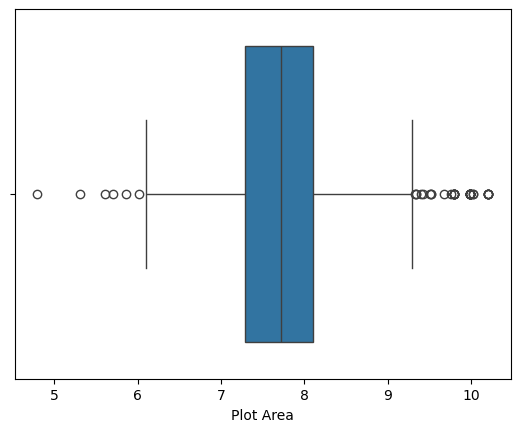

In [114]:
sns.boxplot(x = np.log1p(df['Plot Area']))

In [110]:
df[df['Plot Area'] > 15000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
0,R76627967,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 15 Chandigarh,Chandigarh,"Sector 15 Chandigarh, Chandigarh, India","Sector 15 Chandigarh, Chandigarh, India",15555.56,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.00,sq.yards,7,7,4,Servant Room,North-West,0,2,Others,Old,Marble,No,Semifurnished,3,3,40.00,"24*7 Water,Municipal corporation",NaN,Yes,Yes,This 7 bhk house for sale in sector 15 chandig...,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Ch...","['Feng Shui / Vaastu Compliant', 'Water purifi...",28.00
93,L75658833,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",29843.89,Plot area 4(2023.43 sq.m.) kanal,NaN,NaN,NaN,21780.00,kanal,4,4,3,"Store Room,Pooja Room,Study Room,Servant Room",South,0,1,NaN,Old,Concrete,No,Unfurnished,6,7,35.00,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,Yes,Yes,A 4-Kanal old build house is available for sal...,NaN,"['Water Storage', 'Separate entry for servant ...",65.00
116,F76601439,5Bedrooms 3Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",33333.33,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.00,sq.yards,5,3,4,Servant Room,NaN,0,1,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,4 kanal in vip sector\nNear to lake \nBest sec...,NaN,NaN,60.00
119,H76492941,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",31481.00,Plot area 27000(2508.38 sq.m.) sq.ft.,NaN,NaN,NaN,27000.00,sq.ft.,5,4,4,Servant Room,South-West,0,2,NaN,ModOld,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,Good location \nReady to move \nBeautiful lawn,NaN,NaN,85.00
132,H76376391,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 16 Chandigarh,Chandigarh,"Sector 16 Chandigarh, Chandigarh, India","Sector 16 Chandigarh, Chandigarh, India",28888.89,Plot area 2500(2090.32 sq.m.) sq.yards,NaN,NaN,NaN,22500.00,sq.yards,4,3,4,Store Room,NaN,0,1,NaN,Old,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,5 kanal house in sector 16\nBest location of s...,NaN,NaN,65.00
160,W76036907,6Bedrooms 4Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"9C Sector 9 Chandigarh, Chandigarh, India","9C Sector 9 Chandigarh, Chandigarh, India",40000.00,Plot area 18000(1672.25 sq.m.) sq.ft.,NaN,NaN,NaN,18000.00,sq.ft.,6,4,2,NaN,NaN,0,3,NaN,Old,NaN,No,Unfurnished,4,4,NaN,NaN,NaN,No,No,It's 2 kanal new house in sector 21 having goo...,NaN,NaN,72.00
175,G61779676,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",16666.00,Plot area 27000(2508.38 sq.m.) sq.ft.,NaN,NaN,NaN,27000.00,sq.ft.,5,4,2,NaN,NaN,0,2,NaN,ModOld,NaN,No,NaN,1,1,NaN,NaN,NaN,No,No,Looking for buyer to purchase our house/villa ...,[],NaN,45.00
178,A56306908,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",17407.33,Plot area 3000(2508.38 sq.m.) sq.yards,NaN,NaN,NaN,27000.00,sq.yards,5,5,2,NaN,North,0,2,"Main Road,Ot

In [103]:
row_drop = df[df['PricePerUnit'] < 2000].index

In [104]:
df.drop(row_drop,inplace = True)

<Axes: xlabel='Built Up area'>

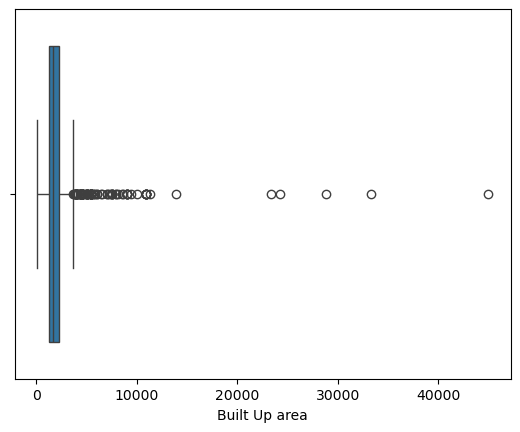

In [123]:
sns.boxplot(x = df['Built Up area'])

In [121]:
df[df['Built Up area'] > 200000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
2803,M76301031,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Wave Estate,Sector 85 Mohali,Mohali,"Wave Estate, Sector 85 Mohali, Mohali, Punjab","Sector 85 Mohali, Mohali, Punjab",14462.81,Plot area 8(202.34 sq.m.)Built Up area: 1800 m...,NaN,490050.00,NaN,2178.00,marla,6,6,4,Store Room,East,0,2,Main Road,New,Marble,Yes,Semifurnished,1,1,40.00,"24*7 Water,Borewell/Tank,Municipal corporation",NaN,No,Yes,Its 8 marla house for sale in wave estate sect...,"['11 Fan', '1 Exhaust Fan', '6 Geyser', '21 Li...","['Private Garden / Terrace', 'False Ceiling Li...",3.15


In [122]:
df.drop(2803,inplace = True)

In [126]:
df[df['Built Up area'] > 20000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
19,Z72029958,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",14838.89,Plot area 307(256.69 sq.m.)Built Up area: 5000...,NaN,45000.00,41400.00,2763.00,sq.yards,6,7,4,"Study Room,Servant Room,Others",West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,0,NaN,24*7 Water,Full,No,Yes,"Spaces open house plan, lots of greenery, big ...","['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",4.10
778,O47357157,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 22 Chandigarh,Chandigarh,"Sector 22 Chandigarh, Chandigarh, India",Sector 22 Nearby Market And Bank Square Sector...,21000.00,Plot area 200(167.23 sq.m.)Built Up area: 2600...,NaN,23400.00,NaN,1800.00,sq.yards,4,3,4,"Pooja Room,Study Room",East,0,2,Main Road,Old,Mosaic,No,Semifurnished,2,2,60.00,24*7 Water,NaN,Yes,Yes,Independent 8 marla liveable double story hous...,"['10 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 G...","['Feng Shui / Vaastu Compliant', 'Park', 'Visi...",3.78
1816,R30052575,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Gillco Valley,Sector 127 Mohali,Mohali,"Gillco Valley, Sector 127 Mohali, Mohali, Punjab","Sector 127 Mohali, Mohali, Punjab",8025.33,Plot area 218.75(182.9 sq.m.)Built Up area: 37...,NaN,33300.00,NaN,1968.75,sq.yards,3,3,2,"Pooja Room,Others",North-West,0,2,Park/Garden,RelNew,Wood,Yes,NaN,2,2,NaN,Municipal corporation,NaN,No,No,Interested to sell independent house/villa.Pla...,[],"['Private Garden / Terrace', 'Park', 'Piped-ga...",1.68
1931,A76680811,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Sunny Enclave,Sector 125 Mohali,Mohali,"Sunny Enclave, Sector 125 Mohali, Mohali, Punjab","6006, Sector 125 Mohali, Mohali, Punjab",10370.33,Plot area 150(125.42 sq.m.)Built Up area: 2700...,NaN,24300.00,22320.00,1350.00,sq.yards,4,4,2,NaN,South-East,0,2,NaN,New,Vitrified,No,Semifurnished,1,1,40.00,Municipal corporation,NaN,No,No,"Backside park.\nTwo side open,\nTwo car parkin...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Park', 'Visitor Parking']",1.40
2309,P30129741,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Gillco Valley,Sector 127 Mohali,Mohali,"Gillco Valley, Sector 127 Mohali, Mohali, Punjab","Sector 127 Mohali, Mohali, Punjab",7828.22,Plot area 220(183.95 sq.m.)Built Up area: 3200...,NaN,28800.00,NaN,1980.00,sq.yards,3,3,4,Others,NaN,0,3,NaN,New,NaN,No,NaN,1,1,NaN,NaN,NaN,No,No,North facing corner house in gillco with compl...,[],NaN,1.55


In [127]:
for i in df[df['Built Up area'] > 20000].index:
    df['Built Up area'].loc[i] = df['Plot Area'].loc[i]

C:\Temp\ipykernel_12868\325263254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Built Up area'].loc[i] = df['Plot Area'].loc[i]
C:\Temp\ipykernel_12868\325263254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Built Up area'].loc[i] = df['Plot Area'].loc[i]
C:\Temp\ipykernel_12868\325263254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Built Up area'].loc[i] = df['Plot Area'].loc[i]
C:\Temp\ipykernel_12868\3

In [128]:
df.loc[[19,778,1816,1931,2309]]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
19,Z72029958,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",14838.89,Plot area 307(256.69 sq.m.)Built Up area: 5000...,NaN,2763.00,41400.00,2763.00,sq.yards,6,7,4,"Study Room,Servant Room,Others",West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,0,NaN,24*7 Water,Full,No,Yes,"Spaces open house plan, lots of greenery, big ...","['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",4.10
778,O47357157,4Bedrooms 3Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 22 Chandigarh,Chandigarh,"Sector 22 Chandigarh, Chandigarh, India",Sector 22 Nearby Market And Bank Square Sector...,21000.00,Plot area 200(167.23 sq.m.)Built Up area: 2600...,NaN,1800.00,NaN,1800.00,sq.yards,4,3,4,"Pooja Room,Study Room",East,0,2,Main Road,Old,Mosaic,No,Semifurnished,2,2,60.00,24*7 Water,NaN,Yes,Yes,Independent 8 marla liveable double story hous...,"['10 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 G...","['Feng Shui / Vaastu Compliant', 'Park', 'Visi...",3.78
1816,R30052575,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Gillco Valley,Sector 127 Mohali,Mohali,"Gillco Valley, Sector 127 Mohali, Mohali, Punjab","Sector 127 Mohali, Mohali, Punjab",8025.33,Plot area 218.75(182.9 sq.m.)Built Up area: 37...,NaN,1968.75,NaN,1968.75,sq.yards,3,3,2,"Pooja Room,Others",North-West,0,2,Park/Garden,RelNew,Wood,Yes,NaN,2,2,NaN,Municipal corporation,NaN,No,No,Interested to sell independent house/villa.Pla...,[],"['Private Garden / Terrace', 'Park', 'Piped-ga...",1.68
1931,A76680811,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Sunny Enclave,Sector 125 Mohali,Mohali,"Sunny Enclave, Sector 125 Mohali, Mohali, Punjab","6006, Sector 125 Mohali, Mohali, Punjab",10370.33,Plot area 150(125.42 sq.m.)Built Up area: 2700...,NaN,1350.00,22320.00,1350.00,sq.yards,4,4,2,NaN,South-East,0,2,NaN,New,Vitrified,No,Semifurnished,1,1,40.00,Municipal corporation,NaN,No,No,"Backside park.\nTwo side open,\nTwo car parkin...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Park', 'Visitor Parking']",1.40
2309,P30129741,3Bedrooms 3Baths,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,Gillco Valley,Sector 127 Mohali,Mohali,"Gillco Valley, Sector 127 Mohali, Mohali, Punjab","Sector 127 Mohali, Mohali, Punjab",7828.22,Plot area 220(183.95 sq.m.)Built Up area: 3200...,NaN,1980.00,NaN,1980.00,sq.yards,3,3,4,Others,NaN,0,3,NaN,New,NaN,No,NaN,1,1,NaN,NaN,NaN,No,No,North facing corner house in gillco with compl...,[],NaN,1.55


<Axes: xlabel='Built Up area'>

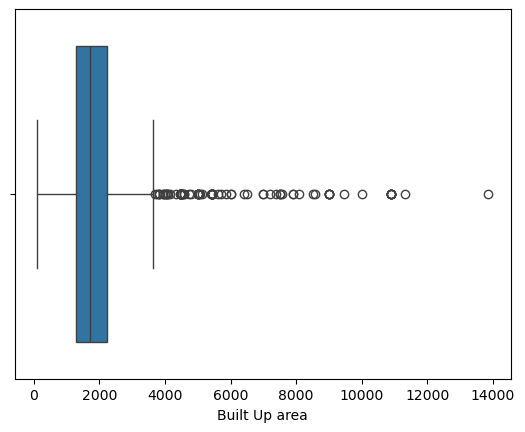

In [129]:
sns.boxplot(x = df['Built Up area'])

<Axes: xlabel='Carpet area'>

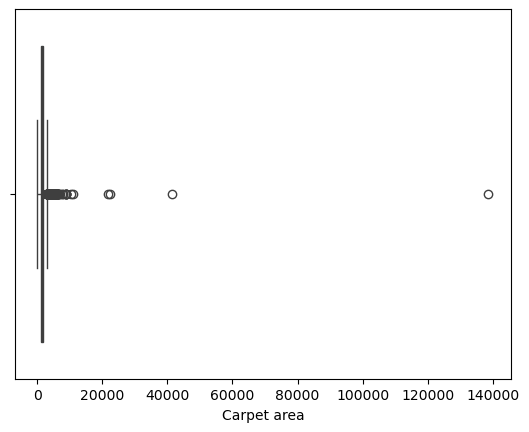

In [130]:
sns.boxplot(x = df['Carpet area'])

In [131]:
df[df['Carpet area'] > 40000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
19,Z72029958,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",14838.89,Plot area 307(256.69 sq.m.)Built Up area: 5000...,NaN,2763.00,41400.00,2763.00,sq.yards,6,7,4,"Study Room,Servant Room,Others",West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,0,NaN,24*7 Water,Full,No,Yes,"Spaces open house plan, lots of greenery, big ...","['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",4.10
1988,R76059877,10Bedrooms 5Baths,House/Villa,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,Sector 115 Mohali,Mohali,"Sector 115 Mohali, Mohali, Punjab","Divine World House No -205, Sector 115 Mohali,...",16666.67,Plot area 200(167.23 sq.m.)Carpet area: 15400 ...,NaN,NaN,138600.00,1800.00,sq.yards,10,5,3,NaN,NaN,0,3,NaN,RelNew,NaN,No,Semifurnished,1,1,NaN,NaN,NaN,No,No,Well maintained room and near landara college,"['1 Water Purifier', '14 Fan', '1 Fridge', '1 ...",NaN,3.00


In [132]:
for i in df[df['Carpet area'] > 40000].index:
    df['Carpet area'].loc[i] = df['Plot Area'].loc[i]

C:\Temp\ipykernel_12868\1754137004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Carpet area'].loc[i] = df['Plot Area'].loc[i]
C:\Temp\ipykernel_12868\1754137004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Carpet area'].loc[i] = df['Plot Area'].loc[i]


In [133]:
df.loc[[19,1988]]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
19,Z72029958,6Bedrooms 7Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,Omaxe New Chandigarh,Mullanpur,Mohali,"Omaxe New Chandigarh, Mullanpur, Chandigarh, I...","Mullanpur, Chandigarh, India",14838.89,Plot area 307(256.69 sq.m.)Built Up area: 5000...,NaN,2763.00,2763.00,2763.00,sq.yards,6,7,4,"Study Room,Servant Room,Others",West,0,3,"Club,Park/Garden,Pool",RelNew,NaN,Yes,Semifurnished,0,0,NaN,24*7 Water,Full,No,Yes,"Spaces open house plan, lots of greenery, big ...","['1 Water Purifier', '10 Fan', '1 Exhaust Fan'...","['Feng Shui / Vaastu Compliant', 'Private Gard...",4.10
1988,R76059877,10Bedrooms 5Baths,House/Villa,https://www.99acres.com/10-bhk-bedroom-indepen...,NaN,Sector 115 Mohali,Mohali,"Sector 115 Mohali, Mohali, Punjab","Divine World House No -205, Sector 115 Mohali,...",16666.67,Plot area 200(167.23 sq.m.)Carpet area: 15400 ...,NaN,NaN,1800.00,1800.00,sq.yards,10,5,3,NaN,NaN,0,3,NaN,RelNew,NaN,No,Semifurnished,1,1,NaN,NaN,NaN,No,No,Well maintained room and near landara college,"['1 Water Purifier', '14 Fan', '1 Fridge', '1 ...",NaN,3.00


<Axes: xlabel='Carpet area'>

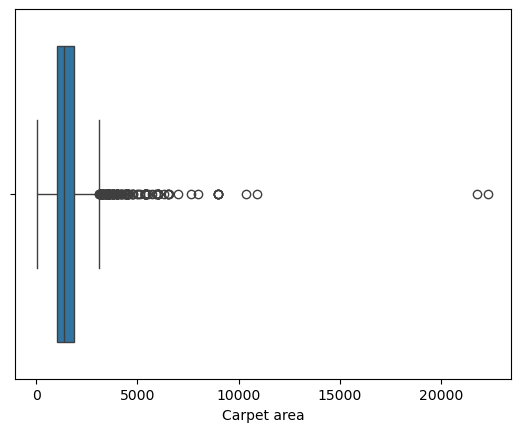

In [134]:
sns.boxplot(x = df['Carpet area'])

In [135]:
# df[df['Carpet area'] > 15000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
638,D55994626,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"Sector 8 Chandigarh, Chandigarh, India",Near Sukhna Lake And Rose Garden And Chandigar...,18365.47,Carpet area: 4 (2023.43 sq.m.) kanal,NaN,NaN,21780.00,NaN,kanal,4,4,3,"Pooja Room,Study Room,Servant Room,Others",North-West,0,1,Main Road,Old,Mosaic,Yes,Unfurnished,4,2,50.00,"Borewell/Tank,Municipal corporation",NaN,Yes,Yes,Old liveable 4 kanal bungalow for sale at very...,NaN,"['Feng Shui / Vaastu Compliant', 'Centrally Ai...",40.00
1931,A76680811,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,Sunny Enclave,Sector 125 Mohali,Mohali,"Sunny Enclave, Sector 125 Mohali, Mohali, Punjab","6006, Sector 125 Mohali, Mohali, Punjab",10370.33,Plot area 150(125.42 sq.m.)Built Up area: 2700...,NaN,1350.00,22320.00,1350.00,sq.yards,4,4,2,NaN,South-East,0,2,NaN,New,Vitrified,No,Semifurnished,1,1,40.00,Municipal corporation,NaN,No,No,"Backside park.\nTwo side open,\nTwo car parkin...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Park', 'Visitor Parking']",1.40


In [136]:
df['Carpet area'].loc[1931] = df['Plot Area'].loc[1931]

C:\Temp\ipykernel_12868\733538011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Carpet area'].loc[1931] = df['Plot Area'].loc[1931]


In [138]:
df.to_csv("data/area_cleaned/merged-area-clean-v1.csv",index = False)

In [144]:
df['PricePerUnit'].describe()

count    8437.00
mean    11281.89
std      7634.38
min      2000.00
25%      5700.00
50%      8377.00
75%     15411.22
max     57777.78
Name: PricePerUnit, dtype: float64

In [146]:
df['price'].describe()

count   8437.00
mean       3.16
std        5.48
min        0.12
25%        0.85
50%        1.40
75%        3.25
max       85.00
Name: price, dtype: float64

<Axes: xlabel='price'>

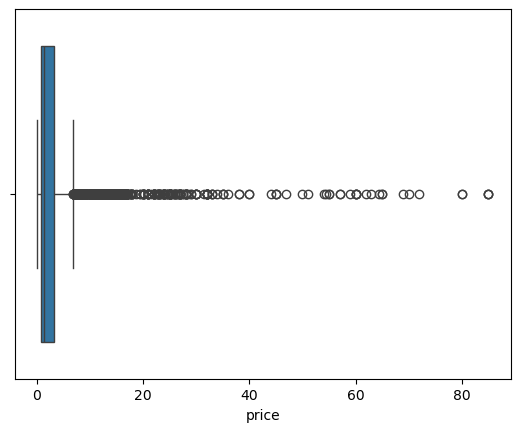

In [147]:
sns.boxplot(x = df['price'])

In [148]:
df[df['price'] > 78]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
119,H76492941,5Bedrooms 4Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",31481.00,Plot area 27000(2508.38 sq.m.) sq.ft.,NaN,NaN,NaN,27000.00,sq.ft.,5,4,4,Servant Room,South-West,0,2,NaN,ModOld,NaN,No,Unfurnished,0,0,NaN,NaN,NaN,No,No,Good location \nReady to move \nBeautiful lawn,NaN,NaN,85.00
192,P74829265,8Bedrooms 8Baths,House/Villa,https://www.99acres.com/8-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",47222.22,Plot area 2000(1672.25 sq.m.) sq.yards,NaN,NaN,NaN,18000.00,sq.yards,8,8,4,"Pooja Room,Study Room,Servant Room",North,0,2,Others,Old,Marble,No,Semifurnished,4,4,60.00,Municipal corporation,Partial,Yes,No,Four kanal property \nPlot area 3000sq yards s...,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 G...","['Maintenance Staff', 'Water Storage', 'Waste ...",85.00
194,A70289322,7Bedrooms 8Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",24074.00,Plot area 3000(2508.38 sq.m.) sq.yards,NaN,NaN,NaN,27000.00,sq.yards,7,8,4,"Pooja Room,Study Room,Servant Room,Others",North,0,2,NaN,Old,Marble,No,Semifurnished,6,4,NaN,NaN,Full,No,No,This property is near to lake golf club. Best ...,"['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light',...","['Private Garden / Terrace', 'Water Storage', ...",85.00
204,E76426049,6Bedrooms 4Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",29629.56,Plot area 3000(2508.38 sq.m.) sq.yards,NaN,NaN,NaN,27000.00,sq.yards,6,4,3,"Store Room,Pooja Room,Study Room,Servant Room",North,0,2,Others,Old,Others,No,Unfurnished,6,4,NaN,Municipal corporation,Full,No,No,An independent 6 kanal house for sale in secto...,NaN,"['Water purifier', 'Water Storage', 'Separate ...",80.00
601,Q70659066,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 9 Chandigarh,Chandigarh,"Sector 9 Chandigarh, Chandigarh, India","Sector 9 Chandigarh, Chandigarh, India",28466.48,Plot area 4(2023.43 sq.m.) kanal,NaN,NaN,NaN,21780.00,kanal,4,4,2,"Pooja Room,Servant Room",East,0,1,Park/Garden,Old,Mosaic,No,Unfurnished,4,2,NaN,Municipal corporation,NaN,Yes,Yes,Prime sector independent near market,NaN,"['Water Storage', 'Park', 'Waste Disposal', 'R...",80.00


In [149]:
df[df['PricePerUnit'] > 50000]

,property_id,property_name,property_type,link,Society,Sector,City,address1,address2,PricePerUnit,area,Super Built Up,Built Up area,Carpet area,Plot Area,area_unit,bedRoom,bathroom,balcony,additionalRoom,facing,FloorNo,TotalFloors,Overlooking,agePossession,Flooring,GatedCommunity,Furnishing,CoveredParking,OpenParking,RoadFacing,WaterSource,PowerBackup,WheelChairFriendly,PetFriendly,description,furnishDetails,features,price
6,O72404166,6Bedrooms 8Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"Sector 8 Chandigarh, Chandigarh, India","500, Sector 8 Chandigarh, Chandigarh, India",55555.56,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,6,8,4,"Pooja Room,Study Room,Servant Room",North,0,2,Main Road,New,Marble,No,Semifurnished,2,2,60.00,Municipal corporation,Partial,No,No,New1 property with lift near park near markit ...,"['1 Water Purifier', '1 Fan', '1 Fridge', '7 G...","['Feng Shui / Vaastu Compliant', 'Private Gard...",25.00
118,W76547977,5Bedrooms 5Baths,House/Villa,https://www.99acres.com/5-bhk-bedroom-independ...,NaN,Sector 33 Chandigarh,Chandigarh,"Sector 33 Chandigarh, Chandigarh, India","Sector 33 Chandigarh, Chandigarh, India",54000.00,Plot area 5000(464.52 sq.m.) sq.ft.,NaN,NaN,NaN,5000.00,sq.ft.,5,5,4,"Servant Room,Pooja Room",North-East,0,2,NaN,RelNew,NaN,No,Furnished,0,0,NaN,NaN,NaN,No,No,Newly built kothi \nItalian marble \nModular k...,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 E...",NaN,27.00
183,L72076614,7Bedrooms 8Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 18 Chandigarh,Chandigarh,"Sector 18 Chandigarh, Chandigarh, India","Sector 18 Chandigarh, Chandigarh, India",57777.78,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,7,8,4,NaN,NaN,0,3,NaN,New,NaN,No,NaN,1,0,60.00,NaN,NaN,No,No,This house in newly built duplex italian marba...,[],"['Private Garden / Terrace', 'Visitor Parking']",26.00
187,E74739165,6Bedrooms 6Baths,House/Villa,https://www.99acres.com/6-bhk-bedroom-independ...,NaN,Sector 18 Chandigarh,Chandigarh,"Sector 18 Chandigarh, Chandigarh, India","Sector 18 Chandigarh, Chandigarh, India",51111.11,Plot area 500(418.06 sq.m.) sq.yards,NaN,NaN,NaN,4500.00,sq.yards,6,6,4,"Pooja Room,Study Room,Servant Room,Others",North,0,2,Others,ModOld,Marble,No,Furnished,2,3,NaN,Municipal corporation,Full,Yes,Yes,New property with lift italian marble good loc...,"['1 Water Purifier', '8 Fan', '1 Fridge', '1 S...","['Feng Shui / Vaastu Compliant', 'Private Gard...",20.00
940,K75428511,7Bedrooms 7Baths,House/Villa,https://www.99acres.com/7-bhk-bedroom-independ...,NaN,Sector 18 Chandigarh,Chandigarh,"Sector 18 Chandigarh, Chandigarh, India","Sector 18 Chandigarh, Chandigarh, India",50769.00,Carpet area: 6500 (603.87 sq.m.) sq.ft.,NaN,NaN,6500.00,NaN,sq.ft.,7,7,3,Store Room,North-East,0,3,NaN,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"2 kanal old triple storey storey , facing nort...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",33.00
1018,S75922689,4Bedrooms 4Baths,House/Villa,https://www.99acres.com/4-bhk-bedroom-independ...,NaN,Sector 35 Chandigarh,Chandigarh,"1 kanal new duplex, Sector 35 Chandigarh, Chan...","Sector 35 Chandigarh, Chandigarh, India",55000.00,Carpet area: 4000 (371.61 sq.m.) sq.ft.,NaN,NaN,4000.00,NaN,sq.ft.,4,4,1,Store Room,East,0,2,Others,New,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"1 kanal newly built duplex , facing east 4 bhk...",NaN,"['Private Garden / Terrace', 'Water Storage', ...",22.00
1025,H75617611,3Bedrooms 1Bath,House/Villa,https://www.99acres.com/3-bhk-bedroom-independ...,NaN,Sector 8 Chandigarh,Chandigarh,"Sector 8 Chandigarh, Chandigarh, India","Sector 8 Chandigarh, Chandigarh, India",54687.00,Carpet area: 1600 (148.64 sq.m.) sq.ft.,NaN,NaN,1600.00,NaN,sq.ft.,3,1,0,NaN,North-East,0,1,Park/Garden,Old,NaN,Yes,Unfurnished,2,2,NaN,"24*7 Water,Municipal corporation",NaN,No,No,"10 marla ol

6.496056855770732


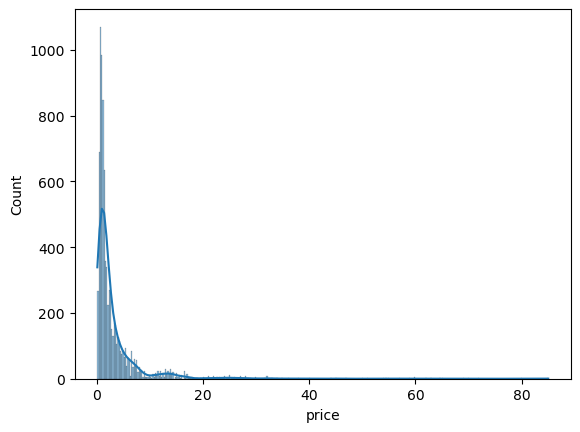

In [152]:
print(df['price'].skew())
sns.histplot(x = df['price'],kde = True)
plt.show()

1.3456152980429514


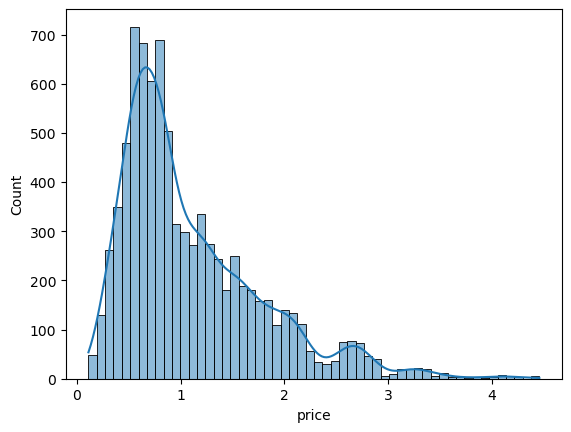

In [153]:
print(np.log1p(df['price']).skew())
sns.histplot(x = np.log1p(df['price']),kde = True)
plt.show()